In [1]:
from time import time

start = time()

## Regex classifier

In [2]:
from sklearn.base import BaseEstimator, RegressorMixin
import numpy as np
import re


#idea credit https://www.linkedin.com/pulse/regex-one-pattern-rule-them-all-find-bring-darkness-bind-carranza/
class RegexClassifier(BaseEstimator, RegressorMixin):
    """
    Language Classifier using Regular Expressions
    """

    language_regex_dict = {
        'el': r'([\u0370-\u03ff\u1f00-\u1fff]+)\s?',  # Greek
        'en': r'([a-zA-Z]+)\s?',  # English
    }

    # STATIC INITALIZATION BLOCK
    # pre-compie all expressions to save execution time
    for lang in language_regex_dict.keys():
        language_regex_dict[lang] = re.compile(language_regex_dict[lang])


    def __init__(self, include_greeklish=True):
        """
        Initialize a new :class:`RegexClassifier` instance.

        :param include_greeklish: Optional. If True, include Greeklish in the language identification process.
        """
        self.include_greeklish = include_greeklish

    def predict(self, x):
        preds = []

        for text in x:
            pred = "other"

            if self.include_greeklish and \
                re.search(RegexClassifier.language_regex_dict["el"], text) and \
                re.search(RegexClassifier.language_regex_dict["en"], text):
                    pred = "greeklish"
            else:
                for lang_code, regex_pattern in RegexClassifier.language_regex_dict.items():
                    match = re.search(regex_pattern, text)
                    if match:
                        pred = lang_code
                        break
            preds.append(pred)
        return np.array(preds)
    
    def fit(self, x, y):
        return self

In [3]:
# Example usage
user_input_text = ["‰Ω†Â•ΩÔºå„Åì„Çå„ÅØ„Çµ„É≥„Éó„É´„Åß„Åô„ÄÇÏïàÎÖïÌïòÏÑ∏Ïöî", "this is an english sentence", "Œ¥ŒµŒΩ Œ±ŒΩœÑŒµœáœâ Œ±ŒªŒªŒø"]
detected_language = RegexClassifier().predict(user_input_text)
print(f"Detected Language Code: {detected_language}")

Detected Language Code: ['other' 'en' 'el']


## Defining the Gold Standard


### Greek-English identification dataset

https://aclanthology.org/L06-1229/
https://aclanthology.org/L04-1369/
https://huggingface.co/datasets/papluca/language-identification

In [4]:
import pandas as pd


def dataset_to_pd(dataset_dict: dict) -> pd.DataFrame:
    df_ls = []
    label_array = np.empty(shape=(sum([len(dataset) for dataset in dataset_dict.values()])), dtype=object)
    last_idx = -1

    for label, dataset in dataset_dict.items():
        new_last_idx = len(dataset) + last_idx
        label_array.put(np.arange(last_idx+1, new_last_idx+1, 1), label)
        last_idx = new_last_idx

        df_ls.append(pd.DataFrame(dataset))

    full_df = pd.concat(df_ls, ignore_index=True)
    full_df["set"] = label_array
    full_df.insert(0, "set", full_df.pop("set"))

    return full_df

In [5]:
from datasets import load_dataset


dataset_dict = load_dataset("papluca/language-identification")
dataset_dict

DatasetDict({
    train: Dataset({
        features: ['labels', 'text'],
        num_rows: 70000
    })
    validation: Dataset({
        features: ['labels', 'text'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['labels', 'text'],
        num_rows: 10000
    })
})

In [6]:
lang_df = dataset_to_pd(dataset_dict)
lang_df

set labels                                               text
0      train     pt  os chefes de defesa da est√≥nia, let√≥nia, litu√¢...
1      train     bg  —Ä–∞–∑–º–µ—Ä—ä—Ç –Ω–∞ —Ö–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª–Ω–∞—Ç–∞ –º—Ä–µ–∂–∞ –º–æ–∂–µ –¥–∞ –±—ä–¥–µ ...
2      train     zh  ÂæàÂ•ΩÔºå‰ª•Ââç‰ªé‰∏çÂéªËØÑ‰ª∑Ôºå‰∏çÁü•ÈÅìÊµ™Ë¥π‰∫ÜÂ§öÂ∞ëÁßØÂàÜÔºåÁé∞Âú®Áü•ÈÅìÁßØÂàÜÂèØ‰ª•Êç¢Èí±ÔºåÂ∞±Ë¶ÅÂ•ΩÂ•ΩËØÑ‰ª∑‰∫ÜÔºåÂêéÊù•ÊàëÂ∞±Êää...
3      train     th  ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö ‡∏Ç‡∏≠‡∏á‡πÄ‡∏Å‡πà‡∏≤ ‡∏ó‡∏µ‡πà ‡∏à‡∏£‡∏¥‡∏á‡∏à‡∏±‡∏á ‡∏•‡∏≠‡∏á   honeychurch  ...
4      train     ru                             –û–Ω —É–≤–µ–ª–∏—á–∏–ª –¥–∞–≤–ª–µ–Ω–∏–µ .
...      ...    ...                                                ...
89995   test     zh                               Âè≤ÊñôÂæàÂÖÖÂàÜÔºåÂØπÂ≤∏ÁöÑÂæàÂ§öËßÇÁÇπ‰∏éÂ§ßÈôÜËø•ÂºÇÂïä„ÄÇ
89996   test     tr  √ñrneƒüin, te≈ühis Yunanca bir kelimeden alƒ±ndƒ± (...
89997   test     vi  N·∫øu lite/light ch·ªâ ƒë∆°n gi·∫£n l√† m√¥ t·∫£ m·ªôt ƒë·∫∑c t...
89998   test     bg  –ù–∞–ø—Ä–∏–º–µ—Ä, –µ–¥–Ω–∞ —â–∞—Ç—Å–∫–∞ —Å—Ç–æ–ª–∏—Ü–∞, –∫–æ—è—Ç–æ –ø–æ—Å–µ—Ç–∏—Ö–º–µ...
89999   test     pl                   Mam dla ciebie kilka propozycji:

[90000 rows x 3 columns]

In [7]:
en_gr_cond = lang_df.labels.eq("el") | lang_df.labels.eq("en")
en_gr_df = lang_df.loc[en_gr_cond, ["labels", "text"]]
en_gr_df

labels                                               text
18        el  Œ†Œ±œÅŒ¨ œÑŒøŒΩ ŒµŒ±œÖœÑœå ŒºŒøœÖ , Œ∑ Œ≥ŒΩœéŒºŒ∑ ŒºŒøœÖ Œ≥ŒπŒ± œÑŒ∑ œÉœçŒΩŒµœÉŒ∑...
39        en                    Didnt really seem to work much.
40        el  ŒëŒ∫œåŒºŒ± Œ∫Œ±Œπ œÑŒø ŒΩŒ± ŒæŒ≠œÅŒµŒπœÇ œåœÑŒπ ŒÆœÑŒ±ŒΩ Œ≠ŒΩŒ± Œ¨Œ≥Œ±ŒªŒºŒ± œÄŒøœÖ...
49        en  Highly recommend for those who don't like bein...
75        el                       Œàœáœâ Œ∫Œ¨ŒΩŒµŒπ œÑŒ≠œÉœÉŒµœÅŒπœÇ ŒÆ œÄŒ≠ŒΩœÑŒµ .
...      ...                                                ...
89961     en  It's super cute, really soft. Print is fine bu...
89965     en  One of them worked, the other one didn't. Ther...
89978     en   I only received one out of the three strikers :(
89982     el  ŒüŒπ ŒøœÅŒ≥Œ±ŒΩŒπœÉŒºŒøŒØ œÄœÅŒ≠œÄŒµŒπ ŒΩŒ± ŒµŒØŒΩŒ±Œπ œÉŒµ Œ∏Œ≠œÉŒ∑ ŒΩŒ± ŒºŒµœÑœÅŒÆ...
89986     el  Œ§Œø Abeam ŒºŒµ œÑŒ∑ŒΩ Arabella, Œ±œÄŒ≠ŒΩŒ±ŒΩœÑŒπ Œ±œÄœå œÑŒø ŒªŒπŒºŒ¨...

[9000 rows x 2 columns]

In [8]:
others_df = lang_df.loc[~en_gr_cond, ["labels", "text"]]
others_df = others_df.sample(15000)
others_df.labels = "other"
others_df

labels                                               text
49980  other  Ataque suicida do I√©men mata 7 soldados: oficiais
46937  other  –Ω–∞ –∏ punchestown racecourses —Å–∞ —Ç—É–∫ , –∞ –Ω–∞—Ü–∏–æ–Ω...
42332  other  Cung ƒëi·ªán dolma-Bahce ( dolmabahce saraye ; do...
81923  other  ‡§ö‡•á‡§ï ‡§∞‡§ø‡§™‡§¨‡•ç‡§≤‡§ø‡§ï ‡§ï‡•á ‡§≤‡§ø‡§è Atta ‡§ï‡•Ä ‡§Ø‡§æ‡§§‡•ç‡§∞‡§æ ‡§π‡•á‡§§‡•Å ibid ‡§™...
80841  other  Ÿàÿßÿ∂ÿ≠ ÿ∑Ÿàÿ± Ÿæÿ±ÿå AICPA ⁄©€å ŸÇÿØÿ± ÿ®⁄ë⁄æÿßŸÜ€í ÿßŸàÿ± ÿ™ÿ¨ÿßÿ±ÿ™ Ÿæÿ± ...
...      ...                                                ...
11586  other  ‡§≤‡•á‡§ï‡§ø‡§® ‡§Ü‡§™ ‡§á‡§∏ ‡§¶‡•á‡§∂ ‡§î‡§∞ ‡§â‡§∏‡§ï‡•á ‡§Æ‡§π‡§æ‡§® ‡§ï‡•â‡§∞ ‡•ç ‡§™‡•ã‡§∞‡•á‡§∂‡§® ‡§ï‡•ã ‡§á...
14982  other                  3mm„ÅÆÊÆµÂ∑Æ„ÅßÊ†πÂÖÉ„Åå„Ç∞„É©„Å§„Åç„ÄÅÊúÄÁµÇÁöÑ„Å´Ê†πÂÖÉ„Åã„Çâ„Éë„ÉÉ„ÇØ„É™Ââ≤„Çå„Åæ„Åó„Åü„ÄÇ
13868  other  "Przyjaciele Syrii" w Doha rozmawiajƒÖ o uzbroj...
33077  other  ÿßÿ≥ ⁄©€í ÿ≥€åÿ±Ÿàÿ¥⁄©ÿßÿ± ( ÿ≥€åÿ±Ÿàÿ¥⁄©ÿßÿ± ) ÿßŸàÿ± ÿ≥€åÿ±Ÿàÿ¥⁄©ÿßÿ± ( ÿ¥ÿß€Å...
38323  other  Facebook zwiƒôksza rozmiar IPO o 25 punkt√≥w pro...

[15000 rows x 2 columns]

In [9]:
gold1_df = pd.concat([en_gr_df, others_df], axis=0, ignore_index=True, copy=False)
gold1_df

labels                                               text
0         el  Œ†Œ±œÅŒ¨ œÑŒøŒΩ ŒµŒ±œÖœÑœå ŒºŒøœÖ , Œ∑ Œ≥ŒΩœéŒºŒ∑ ŒºŒøœÖ Œ≥ŒπŒ± œÑŒ∑ œÉœçŒΩŒµœÉŒ∑...
1         en                    Didnt really seem to work much.
2         el  ŒëŒ∫œåŒºŒ± Œ∫Œ±Œπ œÑŒø ŒΩŒ± ŒæŒ≠œÅŒµŒπœÇ œåœÑŒπ ŒÆœÑŒ±ŒΩ Œ≠ŒΩŒ± Œ¨Œ≥Œ±ŒªŒºŒ± œÄŒøœÖ...
3         en  Highly recommend for those who don't like bein...
4         el                       Œàœáœâ Œ∫Œ¨ŒΩŒµŒπ œÑŒ≠œÉœÉŒµœÅŒπœÇ ŒÆ œÄŒ≠ŒΩœÑŒµ .
...      ...                                                ...
23995  other  ‡§≤‡•á‡§ï‡§ø‡§® ‡§Ü‡§™ ‡§á‡§∏ ‡§¶‡•á‡§∂ ‡§î‡§∞ ‡§â‡§∏‡§ï‡•á ‡§Æ‡§π‡§æ‡§® ‡§ï‡•â‡§∞ ‡•ç ‡§™‡•ã‡§∞‡•á‡§∂‡§® ‡§ï‡•ã ‡§á...
23996  other                  3mm„ÅÆÊÆµÂ∑Æ„ÅßÊ†πÂÖÉ„Åå„Ç∞„É©„Å§„Åç„ÄÅÊúÄÁµÇÁöÑ„Å´Ê†πÂÖÉ„Åã„Çâ„Éë„ÉÉ„ÇØ„É™Ââ≤„Çå„Åæ„Åó„Åü„ÄÇ
23997  other  "Przyjaciele Syrii" w Doha rozmawiajƒÖ o uzbroj...
23998  other  ÿßÿ≥ ⁄©€í ÿ≥€åÿ±Ÿàÿ¥⁄©ÿßÿ± ( ÿ≥€åÿ±Ÿàÿ¥⁄©ÿßÿ± ) ÿßŸàÿ± ÿ≥€åÿ±Ÿàÿ¥⁄©ÿßÿ± ( ÿ¥ÿß€Å...
23999  other  Facebook zwiƒôksza rozmiar IPO o 25 punkt√≥w pro...

[24000 rows x 2 columns]

### Greek-Greeklish identification dataset

In [10]:
head_url = "https://forum.warmane.com"
warmane_url = "https://forum.warmane.com/forumdisplay.php?f=20"

In [11]:
from src.crawling import fetch_soup
from tasks.warmane import parse_warmane_thread
from tqdm import tqdm


threads = []

for page in range(1, 9):
    url = warmane_url + f"&page={page}"
    soup = fetch_soup(url)

    print(f"Processing page {page} of 8...")
    thread_tags = soup.find_all("li", {"class": "threadbit"})
    for thread_tag in tqdm(thread_tags):
        thread = parse_warmane_thread(head_url, thread_tag)
        threads.append(thread)

Processing page 1 of 8...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:05<00:00,  3.99it/s]


Processing page 2 of 8...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:03<00:00,  5.66it/s]


Processing page 3 of 8...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:03<00:00,  5.47it/s]


Processing page 4 of 8...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:03<00:00,  5.50it/s]


Processing page 5 of 8...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:03<00:00,  5.22it/s]


Processing page 6 of 8...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:03<00:00,  5.47it/s]


Processing page 7 of 8...


 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                            | 13/20 [00:02<00:01,  5.14it/s]

ERROR: Failed to get information on post  https://forum.warmane.com/showthread.php?t=272585


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:03<00:00,  5.20it/s]


Processing page 8 of 8...


 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                  | 7/9 [00:01<00:00,  5.41it/s]

ERROR: Failed to get information on post  https://forum.warmane.com/showthread.php?t=278731


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:01<00:00,  5.75it/s]


In [12]:
import itertools

# flatten nested lists 
posts = set(itertools.chain.from_iterable([thread.posts for thread in threads]))
len(posts)

415

In [13]:
import pandas as pd

warmane_df = pd.DataFrame.from_records([post.__dict__ for post in posts], index="id")
warmane_df.reply_to = warmane_df.reply_to.fillna(-1).astype(int)
warmane_df

thread_id           author  \
id                                    
2926596     384475           Ripsin   
2473988     300013           v4gflo   
2420747     290921          AlexPan   
2981903     399822  xAchillesGate4x   
2879517     371804            Csdas   
...            ...              ...   
2877428     353812        Shiverbro   
3069941     423611  crystallenia898   
2801654     350071      Draculation   
2873339     370241           Ripsin   
2410495     289030          boolouk   

                                                  contents       date  \
id                                                                      
2926596  Kalhspera paides,\n\r\nEimai arketo kairo ston... 2018-05-22   
2473988  geia sas.psaxnw ellhniko guild ston Deathwing ... 2015-06-17   
2420747  ŒöŒ±ŒªŒ∑œÉœÄŒ≠œÅŒ± œÄŒ±ŒπŒ¥ŒπŒ¨, œÑŒø œÄœÅœåŒ≤ŒªŒ∑ŒºŒ± ŒµŒØŒΩŒ±Œπ œÑŒø ŒµŒæŒÆœÇ. \... 2015-03-24   
2981903  ŒöŒ±ŒªŒ∑œÉœÄŒ≠œÅŒ± œÄŒ±ŒØŒ¥ŒµœÇ. Œ®Œ¨œáŒΩœâ ŒïŒªŒªŒ∑ŒΩŒπŒ∫œå active raidin... 2019-03-03   
2879517  Opoios gnwrizei kati as mou kanei /w Dremoria ... 2017-11-29   
...                                                    ...        ...   
2877428       kalos private aksizei na ksekiniseis paidia? 2017-11-21   
3069941  Œï ŒºŒµŒπœÇ Œ±œÖŒæŒ±ŒΩœåŒºŒ±œÉœÑŒµ Œ∫Œ±Œπ Œ∏Œ± Œ±œÅœáŒØœÉŒøœÖŒºŒµ ŒΩŒ± œÉœÑŒÆŒΩŒøœÖŒº... 2020-07-26   
2801654                                   Bump! ICC25 6/12 2017-05-07   
2873339  Kalhspera tha ithela na rwthsw an kapoios gnwr... 2017-11-07   
2410495  ŒïŒºœÄŒµŒπœÅŒπŒ± Œµœáœâ, Œ±ŒªŒªŒ± Œ¥ŒµŒΩ Œµœáœâ œáœÅŒøŒΩŒø...Œ±œÖœÑŒø ŒµŒπŒΩŒ±Œπ ... 2015-03-13   

         reply_to  
id                 
2926596        -1  
2473988        -1  
2420747        -1  
2981903        -1  
2879517        -1  
...           ...  
2877428   2875915  
3069941   3068345  
2801654   2795443  
2873339        -1  
2410495   2409274  

[415 rows x 5 columns]

In [14]:
empty_contents = warmane_df.contents.apply(lambda x: x.isspace() | len(x)==0)
warmane_df[empty_contents]

thread_id     author contents       date  reply_to
id                                                         
3082464     427259  malakas17          2020-10-20   3081822
3113236     427259  malakas17          2021-05-12   3113009
3099161     431660  malakas17          2021-02-10   3096432
3113819     427259  malakas17          2021-05-16   3113236
3099593     427259    boonick          2021-02-14   3093400
3081820     427259  malakas17          2020-10-16   3080427
3081822     427259  malakas17          2020-10-16   3081820

In [15]:
warmane_df = warmane_df[~empty_contents]

In [16]:
from src.crawling import ChromeDriverManager, jupyter_options


ChromeDriverManager.set_options(jupyter_options())

In [17]:
from tasks.youtube import extract_search_results, extract_comments, scrape_youtube


greek_yt_urls = ["https://www.youtube.com/watch?v=4Y2gxkqbsbA", 
       "https://www.youtube.com/watch?v=31LcJ9gqQvA",
       "https://www.youtube.com/watch?v=1cZXAQ1JEJo",
       "https://www.youtube.com/watch?v=x7lnS6jMS64",
       "https://www.youtube.com/watch?v=ImilczGN-00"]
scrape_results = []

for url in tqdm(greek_yt_urls):
    scrape_results.append(scrape_youtube(ChromeDriverManager.get(), url, max_scrolls=10, verbose=False))

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

Creating new driver...
New driver online.


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5/5 [01:28<00:00, 17.69s/it]


In [18]:
from tasks.youtube import extract_comments


all_comments = []
for result in scrape_results:
    comments, _ = extract_comments(result)
    all_comments += comments

all_comments = pd.Series(all_comments)

In [19]:
greeklish_series = pd.concat([warmane_df.contents, all_comments])
greeklish_series

2926596    Kalhspera paides,\n\r\nEimai arketo kairo ston...
2473988    geia sas.psaxnw ellhniko guild ston Deathwing ...
2420747    ŒöŒ±ŒªŒ∑œÉœÄŒ≠œÅŒ± œÄŒ±ŒπŒ¥ŒπŒ¨, œÑŒø œÄœÅœåŒ≤ŒªŒ∑ŒºŒ± ŒµŒØŒΩŒ±Œπ œÑŒø ŒµŒæŒÆœÇ. \...
2981903    ŒöŒ±ŒªŒ∑œÉœÄŒ≠œÅŒ± œÄŒ±ŒØŒ¥ŒµœÇ. Œ®Œ¨œáŒΩœâ ŒïŒªŒªŒ∑ŒΩŒπŒ∫œå active raidin...
2879517    Opoios gnwrizei kati as mou kanei /w Dremoria ...
                                 ...                        
812                                        Gianni œÄŒ±ŒØŒæŒµ Pubg
813                                                    Œ†œÅœéœÑŒ∑
814                                                    First
815                                             First of all
816                                                   Œ†œÅœéœÑŒøœÇ
Length: 1225, dtype: object

In [20]:
conditions = (greeklish_series.apply(lambda x: len(x) != 0)) & \
                (greeklish_series.apply(lambda x: "RRR" not in x)) & \
                (greeklish_series.apply(lambda x: "PPP" not in x)) & \
                (greeklish_series.apply(lambda x: "First" not in x))
cleared_greeklish_series = greeklish_series[conditions]
cleared_greeklish_series

2926596    Kalhspera paides,\n\r\nEimai arketo kairo ston...
2473988    geia sas.psaxnw ellhniko guild ston Deathwing ...
2420747    ŒöŒ±ŒªŒ∑œÉœÄŒ≠œÅŒ± œÄŒ±ŒπŒ¥ŒπŒ¨, œÑŒø œÄœÅœåŒ≤ŒªŒ∑ŒºŒ± ŒµŒØŒΩŒ±Œπ œÑŒø ŒµŒæŒÆœÇ. \...
2981903    ŒöŒ±ŒªŒ∑œÉœÄŒ≠œÅŒ± œÄŒ±ŒØŒ¥ŒµœÇ. Œ®Œ¨œáŒΩœâ ŒïŒªŒªŒ∑ŒΩŒπŒ∫œå active raidin...
2879517    Opoios gnwrizei kati as mou kanei /w Dremoria ...
                                 ...                        
810                                               Œ†œÅœéœÑŒø like
811                                                   Œ†œÅœéœÑŒøœÇ
812                                        Gianni œÄŒ±ŒØŒæŒµ Pubg
813                                                    Œ†œÅœéœÑŒ∑
816                                                   Œ†œÅœéœÑŒøœÇ
Length: 1197, dtype: object

In [21]:
regex_model = RegexClassifier(include_greeklish=False)
preds = regex_model.predict(cleared_greeklish_series)

In [22]:
cleared_greeklish_series[preds=="greeklish"]

Series([], dtype: object)

In [23]:
cleared_greeklish_series[preds=="en"]

2926596    Kalhspera paides,\n\r\nEimai arketo kairo ston...
2473988    geia sas.psaxnw ellhniko guild ston Deathwing ...
2879517    Opoios gnwrizei kati as mou kanei /w Dremoria ...
2959390               Bubblethesap Icecrown wotlk horde belf
2947119    den se vrisko kane add evvi  .\nmou leei den u...
                                 ...                        
796                                         Epitelous amogus
801        Ante Pali me ta atoma pou einai first.... Mhn ...
803                                                      Lol
804                                             na xanapexis
809                                                     Hafa
Length: 471, dtype: object

In [24]:
cleared_greeklish_series[preds=="el"]

2420747    ŒöŒ±ŒªŒ∑œÉœÄŒ≠œÅŒ± œÄŒ±ŒπŒ¥ŒπŒ¨, œÑŒø œÄœÅœåŒ≤ŒªŒ∑ŒºŒ± ŒµŒØŒΩŒ±Œπ œÑŒø ŒµŒæŒÆœÇ. \...
2981903    ŒöŒ±ŒªŒ∑œÉœÄŒ≠œÅŒ± œÄŒ±ŒØŒ¥ŒµœÇ. Œ®Œ¨œáŒΩœâ ŒïŒªŒªŒ∑ŒΩŒπŒ∫œå active raidin...
2959391    ŒöŒ±ŒªŒ∑œÉœÄŒµœÅŒ± Œ∏Œ± œÄŒ±œÇ œÉœÑŒπœÇ ŒπŒ¥ŒπœåœÑŒ∑œÑŒµœÇ (properties) œÉ...
2719776    Originally Posted by celphecil\n\nŒöŒ±ŒªŒ∑œÉœÄŒ≠œÅŒ± Œ£œâ...
2971700    ŒïŒªŒªŒ∑ŒΩŒπŒ∫Œø guild , œàŒ±œáŒΩŒøœÖŒºŒµ Œ±œÑŒøŒºŒ± Œ≥ŒπŒ± runs ICC10...
                                 ...                        
810                                               Œ†œÅœéœÑŒø like
811                                                   Œ†œÅœéœÑŒøœÇ
812                                        Gianni œÄŒ±ŒØŒæŒµ Pubg
813                                                    Œ†œÅœéœÑŒ∑
816                                                   Œ†œÅœéœÑŒøœÇ
Length: 718, dtype: object

In [25]:
labels = np.where(preds=="en", "greeklish", "el")
gold2_df = pd.DataFrame({"labels": labels, "text": cleared_greeklish_series})
gold2_df

labels                                               text
2926596  greeklish  Kalhspera paides,\n\r\nEimai arketo kairo ston...
2473988  greeklish  geia sas.psaxnw ellhniko guild ston Deathwing ...
2420747         el  ŒöŒ±ŒªŒ∑œÉœÄŒ≠œÅŒ± œÄŒ±ŒπŒ¥ŒπŒ¨, œÑŒø œÄœÅœåŒ≤ŒªŒ∑ŒºŒ± ŒµŒØŒΩŒ±Œπ œÑŒø ŒµŒæŒÆœÇ. \...
2981903         el  ŒöŒ±ŒªŒ∑œÉœÄŒ≠œÅŒ± œÄŒ±ŒØŒ¥ŒµœÇ. Œ®Œ¨œáŒΩœâ ŒïŒªŒªŒ∑ŒΩŒπŒ∫œå active raidin...
2879517  greeklish  Opoios gnwrizei kati as mou kanei /w Dremoria ...
...            ...                                                ...
810             el                                         Œ†œÅœéœÑŒø like
811             el                                             Œ†œÅœéœÑŒøœÇ
812             el                                  Gianni œÄŒ±ŒØŒæŒµ Pubg
813             el                                              Œ†œÅœéœÑŒ∑
816             el                                             Œ†œÅœéœÑŒøœÇ

[1197 rows x 2 columns]

In [26]:
gold_df = pd.concat([gold1_df, gold2_df])
gold_df

labels                                               text
0       el  Œ†Œ±œÅŒ¨ œÑŒøŒΩ ŒµŒ±œÖœÑœå ŒºŒøœÖ , Œ∑ Œ≥ŒΩœéŒºŒ∑ ŒºŒøœÖ Œ≥ŒπŒ± œÑŒ∑ œÉœçŒΩŒµœÉŒ∑...
1       en                    Didnt really seem to work much.
2       el  ŒëŒ∫œåŒºŒ± Œ∫Œ±Œπ œÑŒø ŒΩŒ± ŒæŒ≠œÅŒµŒπœÇ œåœÑŒπ ŒÆœÑŒ±ŒΩ Œ≠ŒΩŒ± Œ¨Œ≥Œ±ŒªŒºŒ± œÄŒøœÖ...
3       en  Highly recommend for those who don't like bein...
4       el                       Œàœáœâ Œ∫Œ¨ŒΩŒµŒπ œÑŒ≠œÉœÉŒµœÅŒπœÇ ŒÆ œÄŒ≠ŒΩœÑŒµ .
..     ...                                                ...
810     el                                         Œ†œÅœéœÑŒø like
811     el                                             Œ†œÅœéœÑŒøœÇ
812     el                                  Gianni œÄŒ±ŒØŒæŒµ Pubg
813     el                                              Œ†œÅœéœÑŒ∑
816     el                                             Œ†œÅœéœÑŒøœÇ

[25197 rows x 2 columns]

In [27]:
import os


OUTPUT_DIR = "output"

def csv_output(df: pd.DataFrame, filename: str) -> None:
    file = os.path.join(OUTPUT_DIR, filename)
    df.to_csv(file, encoding = 'utf8')
    print(f"File saved successfully as {file}")

In [28]:
csv_output(gold_df, "gold.csv")

File saved successfully as output\gold.csv


## Youtube Crawling

In [29]:
from tasks.youtube import extract_search_results, extract_comments


# "greek songs" search in Greek
song_search_url = "https://www.youtube.com/results?search_query=%CE%B5%CE%BB%CE%BB%CE%B7%CE%BD%CE%B9%CE%BA%CE%B1+%CF%84%CF%81%CE%B1%CE%B3%CE%BF%CF%85%CE%B4%CE%B9%CE%B1"
search_soup = scrape_youtube(ChromeDriverManager.get(), song_search_url, max_scrolls=5, verbose=True)
results_search_song = extract_search_results(search_soup)

Scrolling (0 out of max 5)...
Scrolling (1 out of max 5)...
Scrolling (2 out of max 5)...
Scrolling (3 out of max 5)...
Scrolling (4 out of max 5)...
Scrolling (5 out of max 5)...


In [30]:
gaming_search_url = "https://www.youtube.com/results?search_query=greek+fortnite"
gaming_soup = scrape_youtube(ChromeDriverManager.get(), gaming_search_url, max_scrolls=5, verbose=True)
results_search_gaming = extract_search_results(gaming_soup)

Scrolling (0 out of max 5)...
Scrolling (1 out of max 5)...
Scrolling (2 out of max 5)...
Scrolling (3 out of max 5)...
Scrolling (4 out of max 5)...
Scrolling (5 out of max 5)...


In [31]:
results_df = pd.DataFrame({"title": results_search_song[0] + results_search_gaming[0],
                           "link":  results_search_song[1] + results_search_gaming[1],
                          "source": np.array(len(results_search_song[0])*["song"] + len(results_search_gaming[0])*["gaming"]) })
results_df

title  \
0    \n\nGreek Hits 2023 | Non-Stop Mix by Elegant ...   
1    \n\nŒ†ŒøœÖ 'ŒΩŒ±Œπ œÑŒ± œáœÅœåŒΩŒπŒ± ! - 40 Œ±Œ∏Œ¨ŒΩŒ±œÑŒ±, Œ±Œ≥Œ±œÄŒ∑ŒºŒ≠...   
2    \n\nGreek Mix Songs | Love Hits Non-Stop | Gal...   
3                      \n\nŒåŒºŒøœÅœÜŒ± ŒµŒªŒªŒ∑ŒΩŒπŒ∫Œ¨ œÑœÅŒ±Œ≥ŒøœçŒ¥ŒπŒ±\n   
4         \n\nŒìŒôŒùŒëŒúŒï Œ£ŒüŒ•Œ†ŒïŒ° ŒöŒëŒöŒüŒô ŒóŒ°Œ©ŒïŒ£ ŒìŒôŒë 24 Œ©Œ°ŒïŒ£!\n   
..                                                 ...   
275  \n\nŒ£œÖŒºŒ≤ŒøœÖŒªŒ≠œÇ Œ∫Œ±Œπ ŒöœåŒªœÄŒ± Œ≥ŒπŒ± ŒΩŒ± Œ≥ŒπŒΩŒµŒπœÇ ŒöŒ±ŒªœçœÑŒµœÅŒø...   
276  \n\nŒúŒüŒ• ŒïŒöŒ°Œ•Œ®Œï Œ§Œü ŒõŒëŒ†Œ§ŒüŒ† ŒìŒôŒë ŒùŒë ŒúŒó Œ†ŒëŒôŒñŒ© FORTN...   
277            \n\nŒ†œâœÇ ŒΩŒ± œÄŒ±ŒØŒ∂ŒµŒπœÇ Claw œÉœÑŒø Fortnite!\n   
278  \n\n1 VS 1 CHALLENGE ŒúŒï Œ§ŒóŒù ŒöŒ©ŒùŒ£Œ§ŒëŒùŒ§ŒôŒùŒë ŒëŒ†Œü Pl...   
279  \n\nŒúŒï SCAMMARE ŒöŒüŒ°ŒôŒ§Œ£Œôü§≠üòÇ(SCAMMER GETS SCAMMED...   

                                                  link  source  
0    /watch?v=RcSAggke-_U&pp=ygUjzrXOu867zrfOvc65zr...    song  
1    /watch?v=OdX0y96UPEA&pp=ygUjzrXOu867zrfOvc65zr...    song  
2    /watch?v=lcvlYbyAhpI&pp=ygUjzrXOu867zrfOvc65zr...    song  
3    /watch?v=UIfND1RykJc&pp=ygUjzrXOu867zrfOvc65zr...    song  
4    /watch?v=tlpTl7miJwM&pp=ygUjzrXOu867zrfOvc65zr...    song  
..                                                 ...     ...  
275  /watch?v=bTr9ztR9CUE&pp=ygUOZ3JlZWsgZm9ydG5pdG...  gaming  
276  /watch?v=Cg_QnSO0wQU&pp=ygUOZ3JlZWsgZm9ydG5pdG...  gaming  
277  /watch?v=DnoU4PgA_OM&pp=ygUOZ3JlZWsgZm9ydG5pdG...  gaming  
278  /watch?v=64NObRZWREA&pp=ygUOZ3JlZWsgZm9ydG5pdG...  gaming  
279  /watch?v=ExbSJygJtTE&pp=ygUOZ3JlZWsgZm9ydG5pdG...  gaming  

[280 rows x 3 columns]

In [32]:
results_df.title = results_df.title.apply(lambda x: x.strip())
results_df.link = results_df.link.apply(lambda x: "https://www.youtube.com" + x) 
results_df

title  \
0    Greek Hits 2023 | Non-Stop Mix by Elegant Gree...   
1    Œ†ŒøœÖ 'ŒΩŒ±Œπ œÑŒ± œáœÅœåŒΩŒπŒ± ! - 40 Œ±Œ∏Œ¨ŒΩŒ±œÑŒ±, Œ±Œ≥Œ±œÄŒ∑ŒºŒ≠ŒΩŒ±, ...   
2    Greek Mix Songs | Love Hits Non-Stop | Galaxy ...   
3                            ŒåŒºŒøœÅœÜŒ± ŒµŒªŒªŒ∑ŒΩŒπŒ∫Œ¨ œÑœÅŒ±Œ≥ŒøœçŒ¥ŒπŒ±   
4               ŒìŒôŒùŒëŒúŒï Œ£ŒüŒ•Œ†ŒïŒ° ŒöŒëŒöŒüŒô ŒóŒ°Œ©ŒïŒ£ ŒìŒôŒë 24 Œ©Œ°ŒïŒ£!   
..                                                 ...   
275  Œ£œÖŒºŒ≤ŒøœÖŒªŒ≠œÇ Œ∫Œ±Œπ ŒöœåŒªœÄŒ± Œ≥ŒπŒ± ŒΩŒ± Œ≥ŒπŒΩŒµŒπœÇ ŒöŒ±ŒªœçœÑŒµœÅŒøœÇ œÄŒ±...   
276     ŒúŒüŒ• ŒïŒöŒ°Œ•Œ®Œï Œ§Œü ŒõŒëŒ†Œ§ŒüŒ† ŒìŒôŒë ŒùŒë ŒúŒó Œ†ŒëŒôŒñŒ© FORTNITE!   
277                  Œ†œâœÇ ŒΩŒ± œÄŒ±ŒØŒ∂ŒµŒπœÇ Claw œÉœÑŒø Fortnite!   
278  1 VS 1 CHALLENGE ŒúŒï Œ§ŒóŒù ŒöŒ©ŒùŒ£Œ§ŒëŒùŒ§ŒôŒùŒë ŒëŒ†Œü PlaySt...   
279  ŒúŒï SCAMMARE ŒöŒüŒ°ŒôŒ§Œ£Œôü§≠üòÇ(SCAMMER GETS SCAMMED){GR...   

                                                  link  source  
0    https://www.youtube.com/watch?v=RcSAggke-_U&pp...    song  
1    https://www.youtube.com/watch?v=OdX0y96UPEA&pp...    song  
2    https://www.youtube.com/watch?v=lcvlYbyAhpI&pp...    song  
3    https://www.youtube.com/watch?v=UIfND1RykJc&pp...    song  
4    https://www.youtube.com/watch?v=tlpTl7miJwM&pp...    song  
..                                                 ...     ...  
275  https://www.youtube.com/watch?v=bTr9ztR9CUE&pp...  gaming  
276  https://www.youtube.com/watch?v=Cg_QnSO0wQU&pp...  gaming  
277  https://www.youtube.com/watch?v=DnoU4PgA_OM&pp...  gaming  
278  https://www.youtube.com/watch?v=64NObRZWREA&pp...  gaming  
279  https://www.youtube.com/watch?v=ExbSJygJtTE&pp...  gaming  

[280 rows x 3 columns]

In [33]:
greeklish_model = RegexClassifier(include_greeklish=True)
preds = greeklish_model.predict(results_df.title)
gr_res_df = results_df[(preds != "en") & (preds != None)]
gr_res_df

title  \
1    Œ†ŒøœÖ 'ŒΩŒ±Œπ œÑŒ± œáœÅœåŒΩŒπŒ± ! - 40 Œ±Œ∏Œ¨ŒΩŒ±œÑŒ±, Œ±Œ≥Œ±œÄŒ∑ŒºŒ≠ŒΩŒ±, ...   
3                            ŒåŒºŒøœÅœÜŒ± ŒµŒªŒªŒ∑ŒΩŒπŒ∫Œ¨ œÑœÅŒ±Œ≥ŒøœçŒ¥ŒπŒ±   
4               ŒìŒôŒùŒëŒúŒï Œ£ŒüŒ•Œ†ŒïŒ° ŒöŒëŒöŒüŒô ŒóŒ°Œ©ŒïŒ£ ŒìŒôŒë 24 Œ©Œ°ŒïŒ£!   
5    ŒúŒøœÖœÉŒπŒ∫ŒÆ ŒπœÉœÑŒøœÅŒØŒ± ŒùŒø.1 (ŒºŒ≠œÅŒøœÇ œÄœÅœéœÑŒø) - 100 œáœÅœÖœÉŒ¨...   
10   ŒöŒ±ŒΩŒµŒØœÇ ŒïŒ¥œé ŒîŒµŒΩ Œ§œÅŒ±Œ≥ŒøœÖŒ¥Œ¨ - Kaneis Edw Den Trago...   
..                                                 ...   
275  Œ£œÖŒºŒ≤ŒøœÖŒªŒ≠œÇ Œ∫Œ±Œπ ŒöœåŒªœÄŒ± Œ≥ŒπŒ± ŒΩŒ± Œ≥ŒπŒΩŒµŒπœÇ ŒöŒ±ŒªœçœÑŒµœÅŒøœÇ œÄŒ±...   
276     ŒúŒüŒ• ŒïŒöŒ°Œ•Œ®Œï Œ§Œü ŒõŒëŒ†Œ§ŒüŒ† ŒìŒôŒë ŒùŒë ŒúŒó Œ†ŒëŒôŒñŒ© FORTNITE!   
277                  Œ†œâœÇ ŒΩŒ± œÄŒ±ŒØŒ∂ŒµŒπœÇ Claw œÉœÑŒø Fortnite!   
278  1 VS 1 CHALLENGE ŒúŒï Œ§ŒóŒù ŒöŒ©ŒùŒ£Œ§ŒëŒùŒ§ŒôŒùŒë ŒëŒ†Œü PlaySt...   
279  ŒúŒï SCAMMARE ŒöŒüŒ°ŒôŒ§Œ£Œôü§≠üòÇ(SCAMMER GETS SCAMMED){GR...   

                                                  link  source  
1    https://www.youtube.com/watch?v=OdX0y96UPEA&pp...    song  
3    https://www.youtube.com/watch?v=UIfND1RykJc&pp...    song  
4    https://www.youtube.com/watch?v=tlpTl7miJwM&pp...    song  
5    https://www.youtube.com/watch?v=p5g82ta4sTk&pp...    song  
10   https://www.youtube.com/watch?v=SlJ9x3A0NmU&pp...    song  
..                                                 ...     ...  
275  https://www.youtube.com/watch?v=bTr9ztR9CUE&pp...  gaming  
276  https://www.youtube.com/watch?v=Cg_QnSO0wQU&pp...  gaming  
277  https://www.youtube.com/watch?v=DnoU4PgA_OM&pp...  gaming  
278  https://www.youtube.com/watch?v=64NObRZWREA&pp...  gaming  
279  https://www.youtube.com/watch?v=ExbSJygJtTE&pp...  gaming  

[245 rows x 3 columns]

In [34]:
from selenium.common.exceptions import JavascriptException
import bs4


def scrape(urls: list[str]) -> list[tuple[str, bs4.BeautifulSoup]]:
    scrape_results = []
    
    print("Scraping videos...")
    for url in tqdm(urls):
        try:
            scrape_results.append((url, scrape_youtube(ChromeDriverManager.get(), url, max_scrolls=10, scroll_wait_secs=1.3, verbose=False)))
        except JavascriptException:
            continue
        except Exception as e:
            print(e)
            continue  
    return scrape_results


def process_scraped(scrape_results: list[tuple[str, bs4.BeautifulSoup]]) -> pd.DataFrame:
    scraped_urls = []
    comments = []
    dates = []
    
    print("Processing comments...")
    print(type(scrape_results[0]))
    for url, result in tqdm(scrape_results):
        if result is not None:
            new_comments, new_dates = extract_comments(result)
            comments += new_comments
            dates += new_dates
            scraped_urls += ([url] * len(new_comments))
    return pd.DataFrame({"link": scraped_urls, "text": comments, "date": dates})


def filter_comments(df: pd.DataFrame) -> pd.DataFrame:
    preds = greeklish_model.predict(df.text)
    mask = ((preds != "el") & (preds != "greeklish"))
    return comments_df[mask]

In [35]:
crawl_df = pd.read_csv("output/temp.csv", encoding="utf8")
crawl_df.date = pd.to_datetime(crawl_df.date)
crawl_df

Unnamed: 0                                              title  \
0              0  Œ†ŒøœÖ 'ŒΩŒ±Œπ œÑŒ± œáœÅœåŒΩŒπŒ± ! - 40 Œ±Œ∏Œ¨ŒΩŒ±œÑŒ±, Œ±Œ≥Œ±œÄŒ∑ŒºŒ≠ŒΩŒ±, ...   
1              1  Œ†ŒøœÖ 'ŒΩŒ±Œπ œÑŒ± œáœÅœåŒΩŒπŒ± ! - 40 Œ±Œ∏Œ¨ŒΩŒ±œÑŒ±, Œ±Œ≥Œ±œÄŒ∑ŒºŒ≠ŒΩŒ±, ...   
2              2  Œ†ŒøœÖ 'ŒΩŒ±Œπ œÑŒ± œáœÅœåŒΩŒπŒ± ! - 40 Œ±Œ∏Œ¨ŒΩŒ±œÑŒ±, Œ±Œ≥Œ±œÄŒ∑ŒºŒ≠ŒΩŒ±, ...   
3              3  Œ†ŒøœÖ 'ŒΩŒ±Œπ œÑŒ± œáœÅœåŒΩŒπŒ± ! - 40 Œ±Œ∏Œ¨ŒΩŒ±œÑŒ±, Œ±Œ≥Œ±œÄŒ∑ŒºŒ≠ŒΩŒ±, ...   
4              4  ŒúŒøœÖœÉŒπŒ∫ŒÆ ŒπœÉœÑŒøœÅŒØŒ± ŒùŒø.1 (ŒºŒ≠œÅŒøœÇ œÄœÅœéœÑŒø) - 100 œáœÅœÖœÉŒ¨...   
...          ...                                                ...   
3450        3450                   ŒòŒ± ŒßœâœÅŒØœÉœâ ŒïŒæŒ±ŒπœÑŒØŒ±œÇ Œ§ŒøœÖ Fortnite‚Ä¶   
3451        3451                   ŒòŒ± ŒßœâœÅŒØœÉœâ ŒïŒæŒ±ŒπœÑŒØŒ±œÇ Œ§ŒøœÖ Fortnite‚Ä¶   
3452        3452                   ŒòŒ± ŒßœâœÅŒØœÉœâ ŒïŒæŒ±ŒπœÑŒØŒ±œÇ Œ§ŒøœÖ Fortnite‚Ä¶   
3453        3453                   ŒòŒ± ŒßœâœÅŒØœÉœâ ŒïŒæŒ±ŒπœÑŒØŒ±œÇ Œ§ŒøœÖ Fortnite‚Ä¶   
3454        3454                   ŒòŒ± ŒßœâœÅŒØœÉœâ ŒïŒæŒ±ŒπœÑŒØŒ±œÇ Œ§ŒøœÖ Fortnite‚Ä¶   

                                                   link  source  \
0     https://www.youtube.com/watch?v=OdX0y96UPEA&pp...    song   
1     https://www.youtube.com/watch?v=OdX0y96UPEA&pp...    song   
2     https://www.youtube.com/watch?v=OdX0y96UPEA&pp...    song   
3     https://www.youtube.com/watch?v=OdX0y96UPEA&pp...    song   
4     https://www.youtube.com/watch?v=p5g82ta4sTk&pp...    song   
...                                                 ...     ...   
3450  https://www.youtube.com/watch?v=jla9IrQAIkk&pp...  gaming   
3451  https://www.youtube.com/watch?v=jla9IrQAIkk&pp...  gaming   
3452  https://www.youtube.com/watch?v=jla9IrQAIkk&pp...  gaming   
3453  https://www.youtube.com/watch?v=jla9IrQAIkk&pp...  gaming   
3454  https://www.youtube.com/watch?v=jla9IrQAIkk&pp...  gaming   

                                                   text       date  
0               Great selection, one more time. THANKS! 2023-07-27  
1                                                   NaN 2023-07-27  
2                                                   NaN 2023-09-27  
3                                                     Ô∏è 2023-07-27  
4     √éncƒÉ  o zi petrecutƒÉ cu muzica voastrƒÉ  fantas... 2022-11-27  
...                                                 ...        ...  
3450                                               Fake 2023-11-18  
3451  malaka einai gia ton poutso to stisimo tou vinteo 2023-11-23  
3452                                           KALITERA 2023-11-19  
3453  o monos youtuber pou dn exei bgalei pote fake ... 2023-11-18  
3454                                          epitelous 2023-11-18  

[3455 rows x 6 columns]

In [36]:
crawl_df = crawl_df.dropna()
crawl_df = crawl_df[~crawl_df.text.apply(lambda x: len(x.strip())==0)]
crawl_df

Unnamed: 0                                              title  \
0              0  Œ†ŒøœÖ 'ŒΩŒ±Œπ œÑŒ± œáœÅœåŒΩŒπŒ± ! - 40 Œ±Œ∏Œ¨ŒΩŒ±œÑŒ±, Œ±Œ≥Œ±œÄŒ∑ŒºŒ≠ŒΩŒ±, ...   
3              3  Œ†ŒøœÖ 'ŒΩŒ±Œπ œÑŒ± œáœÅœåŒΩŒπŒ± ! - 40 Œ±Œ∏Œ¨ŒΩŒ±œÑŒ±, Œ±Œ≥Œ±œÄŒ∑ŒºŒ≠ŒΩŒ±, ...   
4              4  ŒúŒøœÖœÉŒπŒ∫ŒÆ ŒπœÉœÑŒøœÅŒØŒ± ŒùŒø.1 (ŒºŒ≠œÅŒøœÇ œÄœÅœéœÑŒø) - 100 œáœÅœÖœÉŒ¨...   
5              5  ŒúŒøœÖœÉŒπŒ∫ŒÆ ŒπœÉœÑŒøœÅŒØŒ± ŒùŒø.1 (ŒºŒ≠œÅŒøœÇ œÄœÅœéœÑŒø) - 100 œáœÅœÖœÉŒ¨...   
6              6  ŒúŒøœÖœÉŒπŒ∫ŒÆ ŒπœÉœÑŒøœÅŒØŒ± ŒùŒø.1 (ŒºŒ≠œÅŒøœÇ œÄœÅœéœÑŒø) - 100 œáœÅœÖœÉŒ¨...   
...          ...                                                ...   
3450        3450                   ŒòŒ± ŒßœâœÅŒØœÉœâ ŒïŒæŒ±ŒπœÑŒØŒ±œÇ Œ§ŒøœÖ Fortnite‚Ä¶   
3451        3451                   ŒòŒ± ŒßœâœÅŒØœÉœâ ŒïŒæŒ±ŒπœÑŒØŒ±œÇ Œ§ŒøœÖ Fortnite‚Ä¶   
3452        3452                   ŒòŒ± ŒßœâœÅŒØœÉœâ ŒïŒæŒ±ŒπœÑŒØŒ±œÇ Œ§ŒøœÖ Fortnite‚Ä¶   
3453        3453                   ŒòŒ± ŒßœâœÅŒØœÉœâ ŒïŒæŒ±ŒπœÑŒØŒ±œÇ Œ§ŒøœÖ Fortnite‚Ä¶   
3454        3454                   ŒòŒ± ŒßœâœÅŒØœÉœâ ŒïŒæŒ±ŒπœÑŒØŒ±œÇ Œ§ŒøœÖ Fortnite‚Ä¶   

                                                   link  source  \
0     https://www.youtube.com/watch?v=OdX0y96UPEA&pp...    song   
3     https://www.youtube.com/watch?v=OdX0y96UPEA&pp...    song   
4     https://www.youtube.com/watch?v=p5g82ta4sTk&pp...    song   
5     https://www.youtube.com/watch?v=p5g82ta4sTk&pp...    song   
6     https://www.youtube.com/watch?v=p5g82ta4sTk&pp...    song   
...                                                 ...     ...   
3450  https://www.youtube.com/watch?v=jla9IrQAIkk&pp...  gaming   
3451  https://www.youtube.com/watch?v=jla9IrQAIkk&pp...  gaming   
3452  https://www.youtube.com/watch?v=jla9IrQAIkk&pp...  gaming   
3453  https://www.youtube.com/watch?v=jla9IrQAIkk&pp...  gaming   
3454  https://www.youtube.com/watch?v=jla9IrQAIkk&pp...  gaming   

                                                   text       date  
0               Great selection, one more time. THANKS! 2023-07-27  
3                                                     Ô∏è 2023-07-27  
4     √éncƒÉ  o zi petrecutƒÉ cu muzica voastrƒÉ  fantas... 2022-11-27  
5     ANTIGUAS CANCIONES DE GRECIA PAIS NATAL DE MIS... 2022-11-27  
6      FelicitƒÉriSuperb \nSƒÉ fi»õi mereu bine \nMomen... 2022-11-27  
...                                                 ...        ...  
3450                                               Fake 2023-11-18  
3451  malaka einai gia ton poutso to stisimo tou vinteo 2023-11-23  
3452                                           KALITERA 2023-11-19  
3453  o monos youtuber pou dn exei bgalei pote fake ... 2023-11-18  
3454                                          epitelous 2023-11-18  

[3122 rows x 6 columns]

In [37]:
ChromeDriverManager.quit()

In [38]:
csv_output(crawl_df, "temp.csv")

File saved successfully as output\temp.csv


## Language Identification

https://stats.stackexchange.com/questions/357466/are-unbalanced-datasets-problematic-and-how-does-oversampling-purport-to-he
https://gking.harvard.edu/files/abs/0s-abs.shtml
https://www.kaggle.com/code/residentmario/undersampling-and-oversampling-imbalanced-data


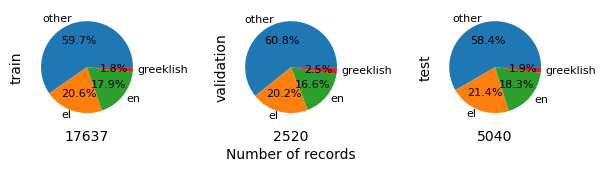

In [39]:
from src.ml import train_test_val_split
import matplotlib.pyplot as plt


data_train, data_val, data_test = train_test_val_split(gold_df, train_ratio=0.7, val_ratio=0.1, test_ratio=0.2,
                                                        random_state=42, stratify_col="labels")
# code block from Ioannis Pavlopoulos
axes = pd.DataFrame({"train": data_train.labels.value_counts(),
              "validation": data_val.labels.value_counts(),
              "test": data_test.labels.value_counts()}
            ).plot.pie(subplots=True, 
                       textprops={'fontsize': 8},
                       autopct=f'%1.1f%%', # print percent% results 
                       legend=False)

axes[0].set_xlabel(data_train.shape[0])
axes[1].set_xlabel(data_val.shape[0])
axes[2].set_xlabel(data_test.shape[0])

axes[1].text(0, -2, 'Number of records', ha='center')

plt.tight_layout(pad=2.0)
plt.show()

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer().fit(data_train.text)
x_train = vectorizer.transform(data_train.text)
y_train = data_train.labels
x_val = vectorizer.transform(data_val.text)
y_val = data_val.labels
x_test = vectorizer.transform(data_test.text)
y_test = data_test.labels

In [41]:
from sklearn.model_selection import cross_val_score


def cross_val_res(model, x, y, scoring=None, cv=10):
    if scoring is None:
        scoring = "f1_macro"
    res = cross_val_score(model, x, y, cv=cv, scoring=scoring)
    return res

### Dummy Classifier

In [42]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import warnings


def get_statistics(y_test, y_pred):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

        print(f"Macro F1: {f1_score(y_test, y_pred, average='macro', zero_division=0)}")
        print(classification_report(y_test, y_pred, zero_division=0))
        ConfusionMatrixDisplay.from_predictions(y_test, 
                                                y_pred, 
                                                colorbar=True)
        plt.show()

Macro F1: 0.18425009397318634
              precision    recall  f1-score   support

          el       0.00      0.00      0.00      1081
          en       0.00      0.00      0.00       920
   greeklish       0.00      0.00      0.00        98
       other       0.58      1.00      0.74      2941

    accuracy                           0.58      5040
   macro avg       0.15      0.25      0.18      5040
weighted avg       0.34      0.58      0.43      5040



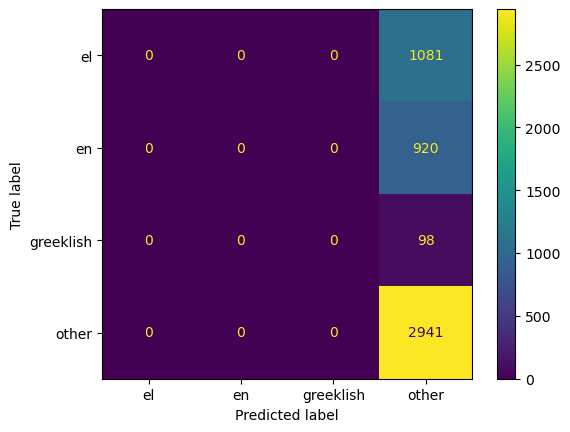

In [43]:
from sklearn.dummy import DummyClassifier, DummyRegressor


majority = DummyClassifier(strategy="most_frequent")
majority.fit(x_train, y_train)
majority_res = majority.predict(x_test)

get_statistics(y_test, majority_res)

### Regex Classification

In [44]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    regex_model = RegexClassifier()
    res = cross_val_res(regex_model, data_train.text, y_train, scoring="f1_macro")
    print(f"Regex Classifier mean macro F1: {res[0]:.4f}, std: {res[1]:.4f}")

Regex Classifier mean macro F1: 0.4604, std: 0.4578


Macro F1: 0.4606684945081718
              precision    recall  f1-score   support

          el       1.00      0.71      0.83      1081
          en       0.32      1.00      0.48       920
   greeklish       0.00      0.00      0.00        98
       other       1.00      0.36      0.53      2941

    accuracy                           0.55      5040
   macro avg       0.58      0.52      0.46      5040
weighted avg       0.85      0.55      0.58      5040



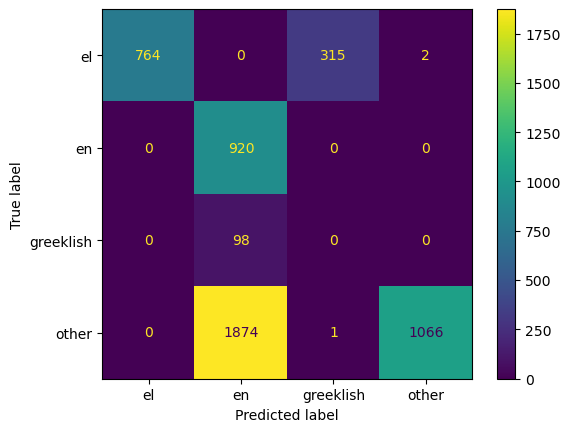

In [45]:
regex_model = RegexClassifier(include_greeklish=True).fit(data_train.text, y_train)
regex_res = regex_model.predict(data_test.text)
get_statistics(y_test, regex_res)

### Naive Bayes

https://towardsdatascience.com/naive-bayes-classifiers-for-text-classification-be0d133d35ba

In [46]:
from sklearn.naive_bayes import MultinomialNB


naive_x_train = x_train.toarray()
naive_x_test = x_test.toarray()

naive_model = MultinomialNB()
res = cross_val_res(naive_model, naive_x_train, y_train, cv=5)
print(f"Naive Bayes mean macro F1-score {res[0]:.4f}, std: {res[1]:.4f}")

Naive Bayes mean macro F1-score 0.7692, std: 0.7874


Macro F1: 0.8104697597941073
              precision    recall  f1-score   support

          el       0.99      0.98      0.98      1081
          en       0.96      1.00      0.98       920
   greeklish       1.00      0.17      0.30        98
       other       0.97      0.99      0.98      2941

    accuracy                           0.98      5040
   macro avg       0.98      0.79      0.81      5040
weighted avg       0.98      0.98      0.97      5040



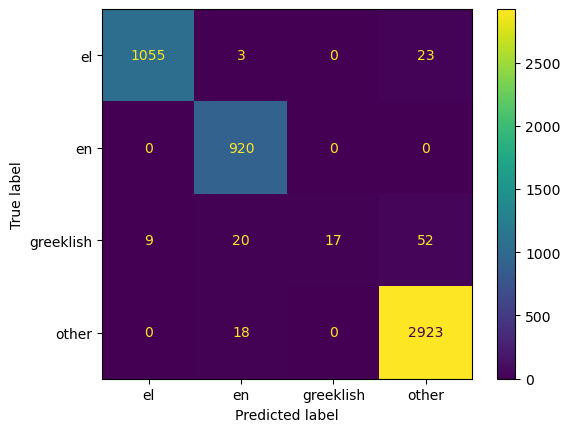

In [47]:
from sklearn.naive_bayes import MultinomialNB


naive_model = MultinomialNB().fit(naive_x_train, y_train)
naive_res = naive_model.predict(naive_x_test)

get_statistics(y_test, naive_res)

### Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression


with warnings.catch_warnings():
    # ignore warnings about deprecated methods in libraries
    warnings.simplefilter("ignore")

    lr = LogisticRegression(max_iter=1000)
    res = cross_val_res(lr, x_train, y_train)
    print(f"Logistic Regression mean macro F1-score {res[0]:.4f}, std: {res[1]:.4f}")

Logistic Regression mean macro F1-score 0.8306, std: 0.8299


Macro F1: 0.8574896165852381
              precision    recall  f1-score   support

          el       1.00      0.92      0.96      1081
          en       0.98      0.97      0.98       920
   greeklish       1.00      0.36      0.53        98
       other       0.94      1.00      0.97      2941

    accuracy                           0.96      5040
   macro avg       0.98      0.81      0.86      5040
weighted avg       0.96      0.96      0.96      5040



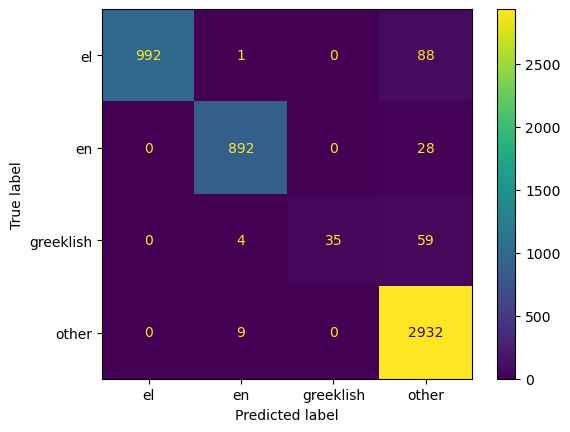

In [49]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    lr = LogisticRegression(max_iter=1000).fit(x_train, y_train)
    lr_res = lr.predict(x_test)

get_statistics(y_test, lr_res)

### Random Forest

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   20.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


Macro F1: 0.9202415562889347
              precision    recall  f1-score   support

          el       1.00      0.97      0.98      1081
          en       0.97      1.00      0.98       920
   greeklish       0.95      0.59      0.73        98
       other       0.98      0.99      0.99      2941

    accuracy                           0.98      5040
   macro avg       0.97      0.89      0.92      5040
weighted avg       0.98      0.98      0.98      5040



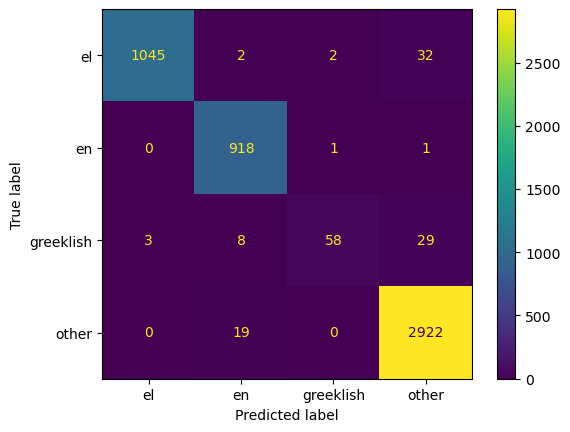

In [50]:
from sklearn.ensemble import RandomForestClassifier


forest_model = RandomForestClassifier(n_estimators=100, 
                                      n_jobs=-1, 
                                      criterion="entropy", 
                                      verbose=1).fit(x_train, y_train)
forest_pred = forest_model.predict(x_test)
get_statistics(y_test, forest_pred)

### Adaboost

Macro F1: 0.8329390991715669
              precision    recall  f1-score   support

          el       0.99      0.87      0.93      1081
          en       0.98      0.95      0.97       920
   greeklish       0.77      0.35      0.48        98
       other       0.93      0.99      0.96      2941

    accuracy                           0.95      5040
   macro avg       0.92      0.79      0.83      5040
weighted avg       0.95      0.95      0.94      5040



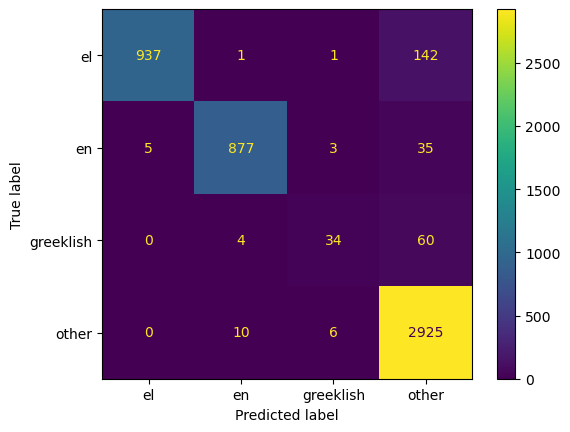

In [51]:
from sklearn.ensemble import AdaBoostClassifier


ada_model = AdaBoostClassifier(n_estimators=100).fit(x_train, y_train)
ada_pred = ada_model.predict(x_test)
get_statistics(y_test, ada_pred)

In [52]:
missed = y_test != ada_pred
pd.DataFrame({"predicted": ada_pred[missed], "actual": data_test[missed].labels, "text": data_test[missed].text})

predicted     actual  \
8826         other         en   
296          other  greeklish   
714          other         el   
2959390      other  greeklish   
504          other         el   
...            ...        ...   
3595         other         el   
7558         other         el   
334          other         el   
4202         other         el   
11807    greeklish      other   

                                                      text  
8826     No matter what I do all the Quick Connects fit...  
296                                             lol fail 3  
714                      ŒâœÑŒ±ŒΩ Œ±œÜŒøœÉŒπœâŒºŒ≠ŒΩŒ∑ œÉ ' Œ±œÖœÑŒÆŒΩ ! ŒïŒ≥œé .  
2959390             Bubblethesap Icecrown wotlk horde belf  
504                                                   500Œ∫  
...                                                    ...  
3595                                     Œ†ŒøœÖŒ±œÅœå ! ŒàŒ∫ŒªŒ±œàŒ± .  
7558     28 Œ£Œµ ŒøœÅŒπœÉŒºŒ≠ŒΩŒµœÇ œÄŒµœÅŒπœÄœÑœéœÉŒµŒπœÇ Œ±œÄŒ±ŒπœÑŒøœçŒΩœÑŒ±Œπ ŒºŒµŒ≥Œ±Œªœç...  
334                                  Œ∫Œ¨ŒΩŒµ league legends 3  
4202                   Œ•œÄŒ¨œÅœáŒøœÖŒΩ œÄŒπŒ∏Œ±ŒΩœéœÇ Œ¨œÄŒµŒπœÅŒøŒπ œÄŒªŒ±ŒΩŒÆœÑŒµœÇ .  
11807    Jab urban ne vietnam kai lye chora, hum thore ...  

[267 rows x 3 columns]

In [53]:
missed = y_test != forest_pred
pd.DataFrame({"predicted": forest_pred[missed], "actual": data_test[missed].labels, "text": data_test[missed].text})

predicted     actual  \
2792275      other  greeklish   
2823457      other  greeklish   
504          other         el   
229      greeklish         el   
388             en  greeklish   
...            ...        ...   
1514         other         el   
23542           en      other   
1444         other         el   
11807           en      other   
3100558      other  greeklish   

                                                      text  
2792275  Meta to xtesino mas raid  ICC25  exume 8/12hc ...  
2823457       kai ellhnes paixtes epishs na lvlaroume mazi  
504                                                   500Œ∫  
229                                  Hayate army Œ±œáŒ±œáŒ±œáŒ±œáŒ±  
388      Konohagakure Hiden Secret Taijutsu Technique: ...  
...                                                    ...  
1514                                      ŒòŒ≠ŒªŒµŒπœÇ Œ¥ŒøœÖŒªŒµŒπŒ¨ ;  
23542                Yeah inauma exactly inauma. i hate it  
1444                             Œ§ŒØœÄŒøœÑŒ± , Œ∫œÖœÅŒØŒ± Œ∫Œ¨Œ≤ŒµŒΩœÑŒπœÇ ;  
11807    Jab urban ne vietnam kai lye chora, hum thore ...  
3100558  80lvl Beast master Hunter pros to paron  3.5 G...  

[97 rows x 3 columns]

### Hyperparameter tuning

In [54]:
estimators = []
scores = []

for n_estimators in tqdm([int(x) for x in np.linspace(start = 100, stop = 1000, num = 5)]):
    estim = RandomForestClassifier(n_estimators=n_estimators, 
                                  n_jobs=-1, 
                                  criterion="entropy").fit(x_train, y_train)
    score = f1_score(y_val, estim.predict(x_val), average='macro', zero_division=0)

    estimators.append(estim)
    scores.append(score)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5/5 [09:10<00:00, 110.17s/it]


In [55]:
best_model = estimators[np.argmax(scores)]
print(f"Best model {best_model} with macro F1 score of {max(scores)}")

Best model RandomForestClassifier(criterion='entropy', n_estimators=775, n_jobs=-1) with macro F1 score of 0.9335344196598307


### Annotating the operational dataset

In [56]:
x_oper = vectorizer.transform(crawl_df.text)
crawl_df["language"] = best_model.predict(x_oper)

In [57]:
csv_output(crawl_df, "crawl.csv")

File saved successfully as output\crawl.csv


### Exploring the operational dataset

In [58]:
crawl_df["language"] = best_model.predict(x_oper)

In [59]:
RESOURCE_OUTPUT = "results"

def save_plot(filename):
    path = os.path.join(RESOURCE_OUTPUT, filename)
    plt.savefig(path, bbox_inches="tight")
    print(f"Figured saved to " + path)

Figured saved to results\lang_dis.png


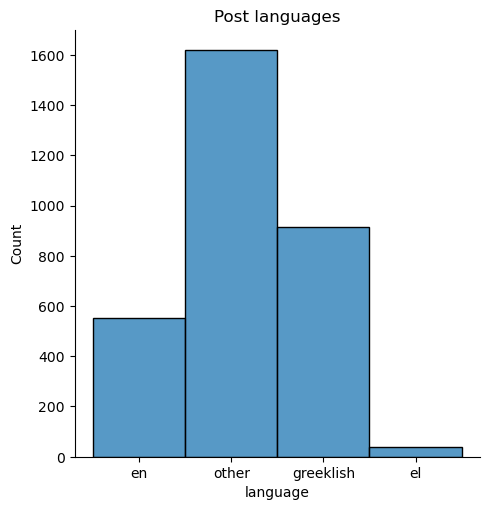

In [60]:
import seaborn as sns


sns.displot(crawl_df.language)
save_plot("lang_dis.png")
plt.title("Post languages")
plt.show()

In [61]:
languages = np.unique(crawl_df.language)

lang_col = []
len_col = []

for language in languages:
    if language != "other":
        comments_text = crawl_df.loc[crawl_df.language == language, "text"]
        comments_length = comments_text.apply(lambda x: len(x))
        
        lang_col += [language] * len(comments_length)
        len_col += list(comments_length)

len_df = pd.DataFrame({"language": lang_col, "comment_length": len_col})

In [62]:
palette ={"el": "blue", "en": "red", "greeklish": "green"}

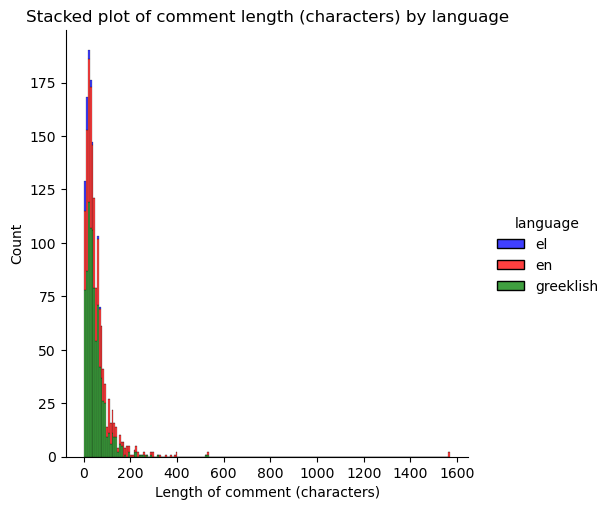

In [63]:
sns.displot(len_df, x="comment_length", hue="language", multiple="stack", palette=palette)
plt.title("Stacked plot of comment length (characters) by language")
plt.xlabel("Length of comment (characters)")
plt.show()

Figured saved to results\length_dis.png


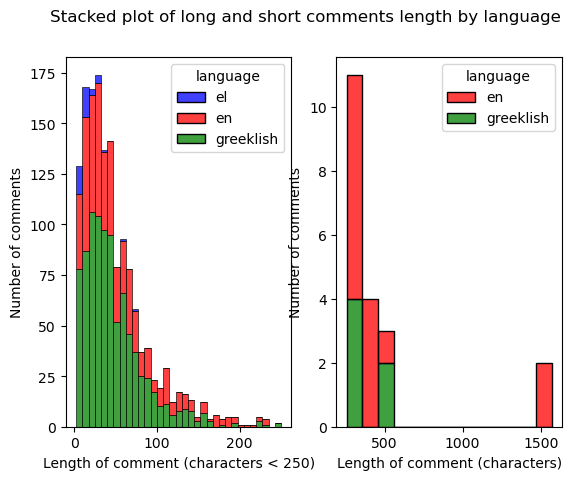

In [64]:
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(len_df[len_df.comment_length<=250],
             x="comment_length", 
             hue="language", 
             multiple="stack", 
             palette=palette,
             ax=ax1)
ax1.set_xlabel("Length of comment (characters < 250)")
ax1.set_ylabel("Number of comments")

sns.histplot(len_df[len_df.comment_length>250], 
             x="comment_length", 
             hue="language", 
             multiple="stack",
             palette=palette,
             ax=ax2)
ax2.set_xlabel("Length of comment (characters)")
ax2.set_ylabel("Number of comments")

fig.suptitle("Stacked plot of long and short comments length by language")
save_plot("length_dis.png")
plt.show()

In [65]:
len_df.iloc[np.argmax(len_df.comment_length)]

language            en
comment_length    1570
Name: 275, dtype: object

In [66]:
emoji_pattern = re.compile(
    r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF'
    r'\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF'
    r'\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\u2600-\u26FF\u2700-\u27BF'
    r'\u2B50\u2B06\u2934\u2935\u2B05\u2194-\u2199\u21A9\u21AA\u2139\u2328'
    r'\u23CF\u23E9-\u23F3\u231A\u23F8-\u23FA\u231B\u23F0\u231A\u1F004'
    r'\u1F0CF\u1F18E\u3030\u303D]'
)

emojis_col = []

for language in languages:
    if language != "other":
        comments_text = crawl_df.loc[crawl_df.language == language, "text"]
        comments_length = comments_text.apply(lambda x: len(emoji_pattern.findall(x)))
    
        emojis_col += list(comments_length)

emoji_df = pd.DataFrame({"language": lang_col, "emojis": emojis_col})

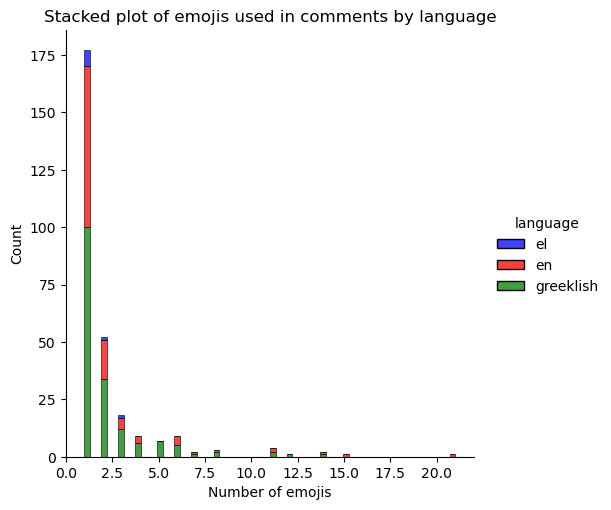

In [67]:
sns.displot(emoji_df[emoji_df.emojis > 0],
            x="emojis", 
            hue="language",
            multiple="stack",
            palette=palette)
plt.title("Stacked plot of emojis used in comments by language")
plt.xlabel("Number of emojis")
plt.show()

Figured saved to results\length_dis.png


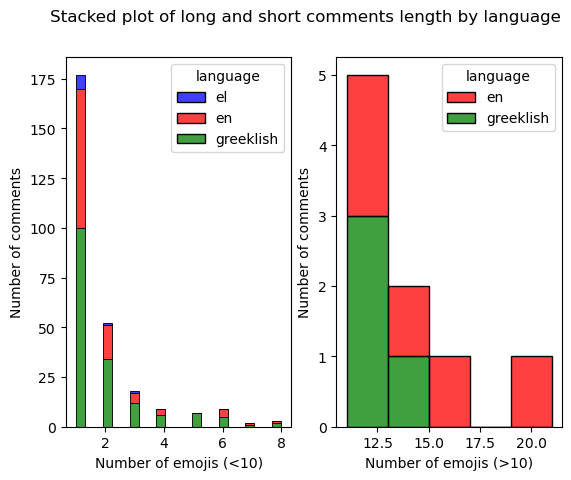

In [68]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.histplot(emoji_df[(emoji_df.emojis > 0) & (emoji_df.emojis < 10)],
             x="emojis",
             hue="language",
             multiple="stack",
             palette=palette,
             ax=ax1)
ax1.set_xlabel("Number of emojis (<10)")
ax1.set_ylabel("Number of comments")

sns.histplot(emoji_df[emoji_df.emojis > 10],
             x="emojis", 
             hue="language", 
             multiple="stack",
             palette=palette,
             ax=ax2)
ax2.set_xlabel("Number of emojis (>10)")
ax2.set_ylabel("Number of comments")

fig.suptitle("Stacked plot of long and short comments length by language")
save_plot("length_dis.png")
plt.show()

In [69]:
date_df = crawl_df.groupby(["date", "language"]).count()
date_df

Unnamed: 0  title  link  source  text
date       language                                        
2015-11-27 el                  1      1     1       1     1
           greeklish           3      3     3       3     3
           other               3      3     3       3     3
2016-11-27 en                  2      2     2       2     2
           other               1      1     1       1     1
...                          ...    ...   ...     ...   ...
2023-11-25 greeklish           3      3     3       3     3
           other               4      4     4       4     4
2023-11-26 en                  2      2     2       2     2
           other               8      8     8       8     8
2023-11-27 other               1      1     1       1     1

[108 rows x 5 columns]

In [70]:
date_df2 = date_df.reset_index()
date_df2.date = pd.to_datetime(date_df2.date)
date_df2.date

0     2015-11-27
1     2015-11-27
2     2015-11-27
3     2016-11-27
4     2016-11-27
         ...    
103   2023-11-25
104   2023-11-25
105   2023-11-26
106   2023-11-26
107   2023-11-27
Name: date, Length: 108, dtype: datetime64[ns]

Figured saved to results\time_plot.png


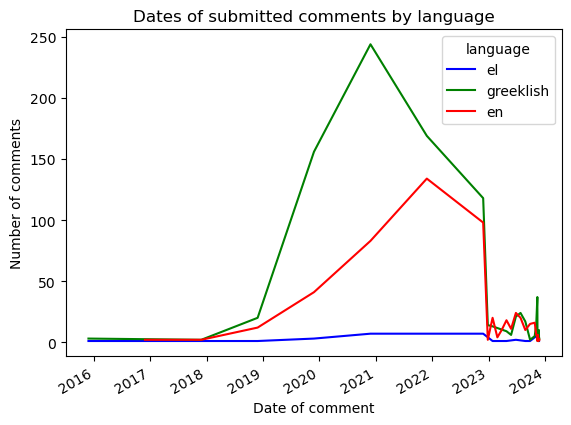

In [71]:
import matplotlib.dates as mdates


sns.lineplot(x="date", 
             y="text",
             hue="language", 
             palette=palette,
             data=date_df2[date_df2.language != "other"])

plt.title("Dates of submitted comments by language")
plt.xlabel("Date of comment")
plt.ylabel("Number of comments")

plt.gcf().autofmt_xdate()
plt.gca().fmt_xdata = mdates.DateFormatter('%Y-%m')

save_plot("time_plot.png")
plt.show()

## Toxicity Classification

### Importing the data

In [72]:
with open(os.path.join("data", "chatgpt_annot.txt"), "r", encoding="utf8") as file:
    raw_annot = file.read()

records = raw_annot.split("\n")
len(records), records[0]

(365,
 '"ŒïŒ±ŒΩ œÉŒ±œÇ Œ¨œÅŒµœÉŒµ Œ∫Œ¨ŒΩœÑŒµ Like œÅŒµŒµŒµ ŒºŒ∑ ŒΩœÑœÅŒ≠œÄŒµœÉœÑŒµ! +1 œåœÉŒøŒπ ŒµŒØŒ¥Œ±ŒΩ œÑŒø ŒºœÄŒªŒøœÖŒ∂Œ¨Œ∫Œπ PDT p.s œÑŒø AR œÑŒø Œ≤Œ¨ŒªŒ±ŒºŒµ Œ≠œÑœÉŒπ Œ≥ŒπŒ± œÉœÖŒΩœÑŒøŒºŒøŒ≥œÅŒ±œÜŒØŒ±, ŒµŒΩŒΩŒøŒµŒØœÑŒ±Œπ œÄœâœÇ Œ¨ŒªŒªŒø AR Œ∫Œ±Œπ Œ¨ŒªŒªŒø œÑœÅŒØœÉœÜŒ±ŒπœÅŒø!" - 1')

In [73]:
annotations = [record.split("-") for record in records]

comments = []
values = []
for annotation in filter(lambda x: len(x) != 1, annotations):
    comment = annotation[0]
    value = int(annotation[1])
    comments.append(comment)
    values.append(value)

comments[0], values[0]

('"ŒïŒ±ŒΩ œÉŒ±œÇ Œ¨œÅŒµœÉŒµ Œ∫Œ¨ŒΩœÑŒµ Like œÅŒµŒµŒµ ŒºŒ∑ ŒΩœÑœÅŒ≠œÄŒµœÉœÑŒµ! +1 œåœÉŒøŒπ ŒµŒØŒ¥Œ±ŒΩ œÑŒø ŒºœÄŒªŒøœÖŒ∂Œ¨Œ∫Œπ PDT p.s œÑŒø AR œÑŒø Œ≤Œ¨ŒªŒ±ŒºŒµ Œ≠œÑœÉŒπ Œ≥ŒπŒ± œÉœÖŒΩœÑŒøŒºŒøŒ≥œÅŒ±œÜŒØŒ±, ŒµŒΩŒΩŒøŒµŒØœÑŒ±Œπ œÄœâœÇ Œ¨ŒªŒªŒø AR Œ∫Œ±Œπ Œ¨ŒªŒªŒø œÑœÅŒØœÉœÜŒ±ŒπœÅŒø!" ',
 1)

In [74]:
toxicity_df = pd.DataFrame({"comments": comments, "toxicity": values})
toxicity_df

comments  toxicity
0    "ŒïŒ±ŒΩ œÉŒ±œÇ Œ¨œÅŒµœÉŒµ Œ∫Œ¨ŒΩœÑŒµ Like œÅŒµŒµŒµ ŒºŒ∑ ŒΩœÑœÅŒ≠œÄŒµœÉœÑŒµ! +...         1
1        "Œ¶ŒÆŒºŒµœÇ ŒªŒ≠ŒΩŒµ œåœÑŒπ Œø Gianuba Œ≤Œ¨Œ∂ŒµŒπ Œ∫Œ±œÅŒ¥ŒøœçŒªŒµœÇ Ô∏è"          1
2    "Congrats on your channel , que venha o 1 milh...         1
3          "Œ§ŒüŒ£Œë Œ§ŒïŒõŒïŒôŒë ŒíŒôŒùŒ§ŒïŒü ŒòŒë ŒöŒëŒùŒïŒô Œü GIANOUBA22"          1
4    "Œó œÜŒ¨œÉŒ∑ œÄŒøœÖ Œø gianuba 22 œÜŒøœÅŒ¨ŒµŒπ ŒºœÄŒªŒøœçŒ∂Œ± pdt nu...         1
..                                                 ...       ...
178  Œ®Œ¨œáŒΩŒøœÖŒºŒµ Œ¨œÑŒøŒºŒ± Œ≥ŒπŒ± raid Œ†Œ±œÅŒ±œÉŒ∫ŒµœÖŒÆ 9:00, Œ£Œ¨Œ≤Œ≤Œ±œÑ...         3
179  ŒúŒÆœÄœâœÇ œÄŒ±ŒØŒ∂Œ±œÑŒµ Œ∫Œ±Œ∏œåŒªŒøœÖ œÉœÑŒøŒΩ œÄŒ±ŒªŒπœå Neltharion œÄœÅ...         4
180            Œ£Œµ Horde ŒÆ Alliance Œ∏Œ± ŒµŒØŒΩŒ±Œπ œÑŒø guild;          1
181  Œ•œÄŒ¨œÅœáŒµŒπ Œ∫Œ±ŒΩŒ≠ŒΩŒ± active ŒµŒªŒªŒ∑ŒΩŒπŒ∫œå guild Œ±œÄœå œÄŒªŒµœÖœÅ...         1
182  ŒòŒ± œÄŒ±ŒØŒæŒµŒπ Œ∫Œ±ŒΩŒµŒØœÇ œÉœÑŒøŒΩ Œ∫Œ±ŒπŒΩŒøœçœÅŒ≥ŒπŒø realm; ŒëŒΩ œàŒ∑Œ∏...         1

[183 rows x 2 columns]

In [75]:
np.unique(toxicity_df.toxicity)

array([1, 2, 3, 4, 5], dtype=int64)

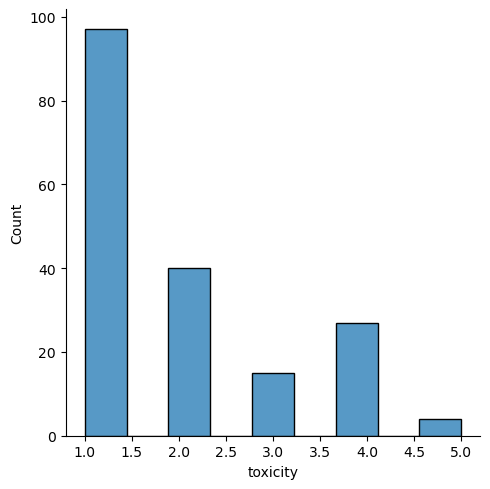

In [76]:
sns.displot(toxicity_df.toxicity)

### Data Transformation

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


data_train, data_test = train_test_split(toxicity_df, random_state=42)
vectorizer = TfidfVectorizer().fit(data_train.comments)
x_train = vectorizer.transform(data_train.comments)
y_train = data_train.toxicity
x_test = vectorizer.transform(data_test.comments)
y_test = data_test.toxicity

### Model Selection

### Naive Bayes

https://towardsdatascience.com/naive-bayes-classifiers-for-text-classification-be0d133d35ba

In [78]:
naive_x_train = x_train.toarray()
naive_x_test = x_test.toarray()

naive_model = MultinomialNB()
res = cross_val_res(naive_model, naive_x_train, y_train, cv=5)
print(f"Naive Bayes mean macro F1-score {res[0]:.4f}, std: {res[1]:.4f}")

Naive Bayes mean macro F1-score 0.2797, std: 0.1395


C:\Users\user\anaconda3\envs\manis\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Macro F1: 0.21913043478260869
              precision    recall  f1-score   support

           1       0.55      0.96      0.70        25
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00         4
           4       0.50      0.33      0.40         3
           5       0.00      0.00      0.00         1

    accuracy                           0.54        46
   macro avg       0.21      0.26      0.22        46
weighted avg       0.33      0.54      0.40        46



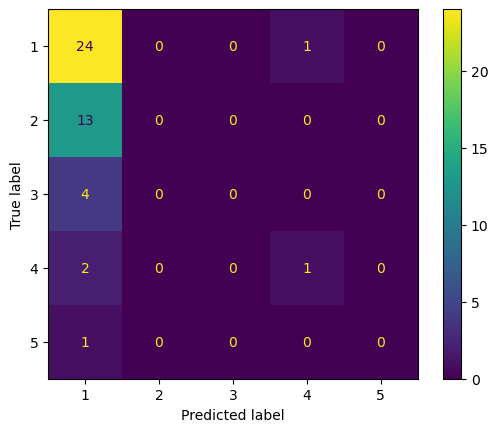

In [79]:
naive_model = MultinomialNB().fit(naive_x_train, y_train)
naive_res = naive_model.predict(naive_x_test)

get_statistics(y_test, naive_res)

### Logistic Regression

In [80]:
with warnings.catch_warnings():
    # ignore warnings about deprecated methods in libraries
    warnings.simplefilter("ignore")

    lr = LogisticRegression(max_iter=1000)
    res = cross_val_res(lr, x_train, y_train)
    print(f"Logistic Regression mean macro F1-score {res[0]:.4f}, std: {res[1]:.4f}")

Logistic Regression mean macro F1-score 0.1818, std: 0.4605


Macro F1: 0.21913043478260869
              precision    recall  f1-score   support

           1       0.55      0.96      0.70        25
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00         4
           4       0.50      0.33      0.40         3
           5       0.00      0.00      0.00         1

    accuracy                           0.54        46
   macro avg       0.21      0.26      0.22        46
weighted avg       0.33      0.54      0.40        46



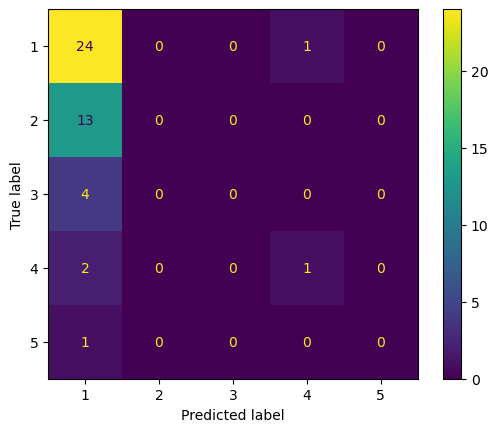

In [81]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    lr = LogisticRegression(max_iter=1000).fit(x_train, y_train)
    lr_res = lr.predict(x_test)

get_statistics(y_test, lr_res)

### Random Forest

In [82]:
forest_model = RandomForestClassifier(n_estimators=50, 
                                      n_jobs=-1, 
                                      criterion="entropy")
res = cross_val_res(forest_model, x_train, y_train)
print(f"Random Forest mean macro F1: {res[0]:.4f}, std: {res[1]:.4f}")

C:\Users\user\anaconda3\envs\manis\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


Random Forest mean macro F1: 0.3092, std: 0.4472


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Macro F1: 0.2173134328358209
              precision    recall  f1-score   support

           1       0.55      0.92      0.69        25
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00         4
           4       0.50      0.33      0.40         3
           5       0.00      0.00      0.00         1

    accuracy                           0.52        46
   macro avg       0.21      0.25      0.22        46
weighted avg       0.33      0.52      0.40        46



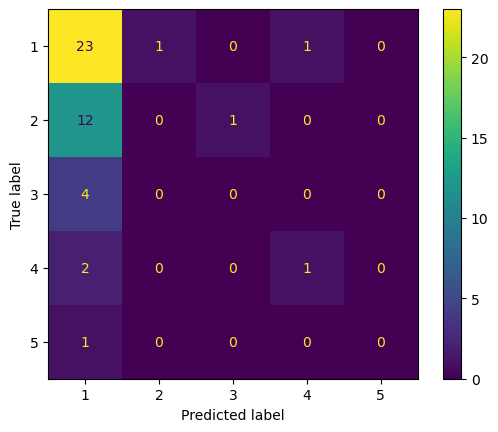

In [95]:
forest_model = RandomForestClassifier(n_estimators=100,
                                      criterion="entropy", 
                                      verbose=1).fit(x_train, y_train)
forest_pred = forest_model.predict(x_test)
get_statistics(y_test, forest_pred)

### Adaboost

In [84]:
ada_model = AdaBoostClassifier(n_estimators=50)
res = cross_val_res(ada_model, x_train, y_train, cv=3)
print(f"AdaBoost mean macro F1: {res[0]:.4f}, std: {res[1]:.4f}")

AdaBoost mean macro F1: 0.2347, std: 0.2274


Macro F1: 0.24285714285714288
              precision    recall  f1-score   support

           1       0.56      1.00      0.71        25
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00         4
           4       1.00      0.33      0.50         3
           5       0.00      0.00      0.00         1

    accuracy                           0.57        46
   macro avg       0.31      0.27      0.24        46
weighted avg       0.37      0.57      0.42        46



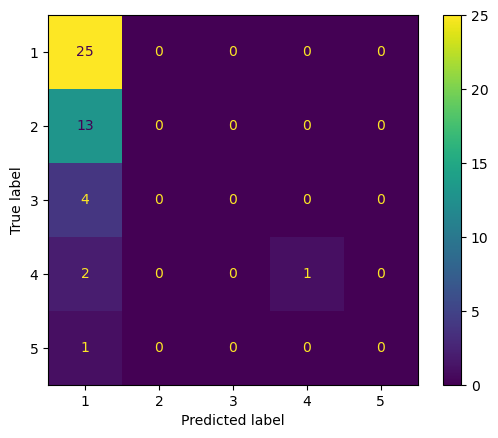

In [85]:
ada_model = AdaBoostClassifier(n_estimators=100).fit(x_train, y_train)
ada_pred = ada_model.predict(x_test)
get_statistics(y_test, ada_pred)

### Classifiying the crawled data

In [97]:
crawl_df["toxicity"] = ada_model.predict(vectorizer.transform(crawl_df.text))
crawl_df

Unnamed: 0                                              title  \
0              0  Œ†ŒøœÖ 'ŒΩŒ±Œπ œÑŒ± œáœÅœåŒΩŒπŒ± ! - 40 Œ±Œ∏Œ¨ŒΩŒ±œÑŒ±, Œ±Œ≥Œ±œÄŒ∑ŒºŒ≠ŒΩŒ±, ...   
3              3  Œ†ŒøœÖ 'ŒΩŒ±Œπ œÑŒ± œáœÅœåŒΩŒπŒ± ! - 40 Œ±Œ∏Œ¨ŒΩŒ±œÑŒ±, Œ±Œ≥Œ±œÄŒ∑ŒºŒ≠ŒΩŒ±, ...   
4              4  ŒúŒøœÖœÉŒπŒ∫ŒÆ ŒπœÉœÑŒøœÅŒØŒ± ŒùŒø.1 (ŒºŒ≠œÅŒøœÇ œÄœÅœéœÑŒø) - 100 œáœÅœÖœÉŒ¨...   
5              5  ŒúŒøœÖœÉŒπŒ∫ŒÆ ŒπœÉœÑŒøœÅŒØŒ± ŒùŒø.1 (ŒºŒ≠œÅŒøœÇ œÄœÅœéœÑŒø) - 100 œáœÅœÖœÉŒ¨...   
6              6  ŒúŒøœÖœÉŒπŒ∫ŒÆ ŒπœÉœÑŒøœÅŒØŒ± ŒùŒø.1 (ŒºŒ≠œÅŒøœÇ œÄœÅœéœÑŒø) - 100 œáœÅœÖœÉŒ¨...   
...          ...                                                ...   
3450        3450                   ŒòŒ± ŒßœâœÅŒØœÉœâ ŒïŒæŒ±ŒπœÑŒØŒ±œÇ Œ§ŒøœÖ Fortnite‚Ä¶   
3451        3451                   ŒòŒ± ŒßœâœÅŒØœÉœâ ŒïŒæŒ±ŒπœÑŒØŒ±œÇ Œ§ŒøœÖ Fortnite‚Ä¶   
3452        3452                   ŒòŒ± ŒßœâœÅŒØœÉœâ ŒïŒæŒ±ŒπœÑŒØŒ±œÇ Œ§ŒøœÖ Fortnite‚Ä¶   
3453        3453                   ŒòŒ± ŒßœâœÅŒØœÉœâ ŒïŒæŒ±ŒπœÑŒØŒ±œÇ Œ§ŒøœÖ Fortnite‚Ä¶   
3454        3454                   ŒòŒ± ŒßœâœÅŒØœÉœâ ŒïŒæŒ±ŒπœÑŒØŒ±œÇ Œ§ŒøœÖ Fortnite‚Ä¶   

                                                   link  source  \
0     https://www.youtube.com/watch?v=OdX0y96UPEA&pp...    song   
3     https://www.youtube.com/watch?v=OdX0y96UPEA&pp...    song   
4     https://www.youtube.com/watch?v=p5g82ta4sTk&pp...    song   
5     https://www.youtube.com/watch?v=p5g82ta4sTk&pp...    song   
6     https://www.youtube.com/watch?v=p5g82ta4sTk&pp...    song   
...                                                 ...     ...   
3450  https://www.youtube.com/watch?v=jla9IrQAIkk&pp...  gaming   
3451  https://www.youtube.com/watch?v=jla9IrQAIkk&pp...  gaming   
3452  https://www.youtube.com/watch?v=jla9IrQAIkk&pp...  gaming   
3453  https://www.youtube.com/watch?v=jla9IrQAIkk&pp...  gaming   
3454  https://www.youtube.com/watch?v=jla9IrQAIkk&pp...  gaming   

                                                   text       date   language  \
0               Great selection, one more time. THANKS! 2023-07-27         en   
3                                                     Ô∏è 2023-07-27      other   
4     √éncƒÉ  o zi petrecutƒÉ cu muzica voastrƒÉ  fantas... 2022-11-27      other   
5     ANTIGUAS CANCIONES DE GRECIA PAIS NATAL DE MIS... 2022-11-27      other   
6      FelicitƒÉriSuperb \nSƒÉ fi»õi mereu bine \nMomen... 2022-11-27      other   
...                                                 ...        ...        ...   
3450                                               Fake 2023-11-18      other   
3451  malaka einai gia ton poutso to stisimo tou vinteo 2023-11-23  greeklish   
3452                                           KALITERA 2023-11-19      other   
3453  o monos youtuber pou dn exei bgalei pote fake ... 2023-11-18  greeklish   
3454                                          epitelous 2023-11-18      other   

      toxicity  
0            1  
3            1  
4            1  
5            1  
6            1  
...        ...  
3450         1  
3451         1  
3452         1  
3453         1  
3454         1  

[3122 rows x 8 columns]

### Analysing the Toxicity of crawled data

#### Finding the most toxic language

In [103]:
crawl_df.loc[:, ["language", "toxicity"]].groupby("language").mean()

toxicity
language           
el         1.000000
en         1.090744
greeklish  1.009847
other      1.000000

#### Finding the most toxic video

In [118]:
toxic_videos_df = crawl_df.loc[:, ["link", "toxicity"]].groupby("link").mean().sort_values("toxicity", ascending=False)
toxic_videos_df

toxicity
link                                                        
https://www.youtube.com/watch?v=dyZXS49yhcU&pp=...  1.333333
https://www.youtube.com/watch?v=_fnNiMXH4PI&pp=...  1.214286
https://www.youtube.com/watch?v=z4DMFzyCkP0&pp=...  1.136364
https://www.youtube.com/watch?v=-hsjov_72W0&pp=...  1.133333
https://www.youtube.com/watch?v=ii2To2gvzkU&pp=...  1.121951
...                                                      ...
https://www.youtube.com/watch?v=JA_8z_JGQnU&pp=...  1.000000
https://www.youtube.com/watch?v=IosIQt6716w&pp=...  1.000000
https://www.youtube.com/watch?v=I_I5RympRL4&pp=...  1.000000
https://www.youtube.com/watch?v=HP26OIbNhX0&pp=...  1.000000
https://www.youtube.com/watch?v=XBig64ZfCKE&pp=...  1.000000

[126 rows x 1 columns]

In [123]:
toxic_videos_df.merge(crawl_df.loc[:, ["link", "title"]].drop_duplicates(), 
                      on="link", 
                      how="inner").loc[:, ["title", "link", "toxicity"]]

title  \
0            Œ°ŒøŒºŒ±ŒΩœÑŒπŒ∫Œ¨ ŒïŒªŒ±œÜœÅŒ¨ Œ§œÅŒ±Œ≥ŒøœçŒ¥ŒπŒ± | Non Stop Mix   
1    ŒûŒïŒöŒõŒïŒôŒîŒ©Œ£Œë ŒüŒõŒü Œ§Œü BATTLE PASS Œ§ŒóŒ£ SEASON 2! (F...   
2    ŒïŒªŒ±œÜœÅŒøŒªŒ±œäŒ∫Œ¨ œÄŒ±ŒªŒπŒ¨ - 120 ŒºŒµŒ≥Œ¨ŒªŒµœÇ ŒµœÄŒπœÑœÖœáŒØŒµœÇ (by ...   
3    Nina Mazani - ŒÜŒ≥œáŒøœÇ (ŒëœÄœå œÑŒø ‚ÄúŒïŒΩŒ∫Œ¨ŒΩœÑŒø: ŒàŒΩŒ±œÇ ŒöœåœÉ...   
4    ŒàŒΩŒ± œÑœÅŒ±Œ≥ŒøœçŒ¥Œπ Œ∑ Œ∂œâŒÆ ŒºŒ±œÇ - 70 Œ±Œ≥Œ±œÄŒ∑ŒºŒ≠ŒΩŒ± œÑœÅŒ±Œ≥ŒøœçŒ¥Œπ...   
..                                                 ...   
121        üò±Œ†Œ±ŒØŒ∂œâ DUO ŒúŒµ Œ§ŒøŒΩ ŒûŒëŒîŒïŒ°Œ¶Œü ŒúŒüŒ•(Fortnite GR)üò±   
122                    Œó ŒìŒπŒ±Œ≥ŒπŒ¨ ŒºŒøœÖ ŒëŒΩœÑŒπŒ¥œÅŒ¨ - FORTNITE   
123  Greek Music Mix 2022 - ŒïŒªŒªŒ∑ŒΩŒπŒ∫Œ± Œ§œÅŒ±Œ≥ŒøœÖŒ¥ŒπŒ± Mix ...   
124      Josephine - ŒúœÄŒµœÅŒ¥Œ≠ŒºŒ±œÑŒ± - Official Music Video   
125                     Œ†ŒëŒôŒñŒüŒ•ŒúŒï ONLY UP Œ£Œ§Œü FORTNITE!   

                                                  link  toxicity  
0    https://www.youtube.com/watch?v=dyZXS49yhcU&pp...  1.333333  
1    https://www.youtube.com/watch?v=_fnNiMXH4PI&pp...  1.214286  
2    https://www.youtube.com/watch?v=z4DMFzyCkP0&pp...  1.136364  
3    https://www.youtube.com/watch?v=-hsjov_72W0&pp...  1.133333  
4    https://www.youtube.com/watch?v=ii2To2gvzkU&pp...  1.121951  
..                                                 ...       ...  
121  https://www.youtube.com/watch?v=JA_8z_JGQnU&pp...  1.000000  
122  https://www.youtube.com/watch?v=IosIQt6716w&pp...  1.000000  
123  https://www.youtube.com/watch?v=I_I5RympRL4&pp...  1.000000  
124  https://www.youtube.com/watch?v=HP26OIbNhX0&pp...  1.000000  
125  https://www.youtube.com/watch?v=XBig64ZfCKE&pp...  1.000000  

[126 rows x 3 columns]

#### Finding videos where toxicity was uniform across time

In [127]:
toxic_time_df = crawl_df.loc[:, ["link", "date", "toxicity"]].groupby(["link", "date"]).mean()
toxic_time_df

toxicity
link                                               date                
https://www.youtube.com/watch?v=-HrCOFXMUx8&pp=... 2023-01-27       1.0
                                                   2023-03-27       1.0
                                                   2023-09-27       1.0
                                                   2023-10-27       1.0
                                                   2023-11-20       1.0
...                                                                 ...
https://www.youtube.com/watch?v=z4DMFzyCkP0&pp=... 2020-11-27       1.0
                                                   2021-11-27       1.0
                                                   2022-11-27       1.3
                                                   2023-01-27       1.0
                                                   2023-06-27       1.0

[414 rows x 1 columns]

In [143]:
toxic_time_var_df = toxic_time_df.groupby(["link", "toxicity"]).std().reset_index().sort_values("toxicity", ascending=True)
uniform_toxic_df = toxic_time_var_df[toxic_time_var_df.toxicity == 1]
uniform_toxic_df.merge(crawl_df.loc[:, ["link", "title"]].drop_duplicates(), 
                      on="link", 
                      how="inner").loc[:, ["title", "link", "toxicity"]]

title  \
0                 Œ§Œë Œ£Œ†ŒëŒúŒï ŒïŒõŒõŒóŒùŒôŒöŒë | KONSTANTINOS SOT   
1    ‚ô´ 5 Œ©œÅŒµœÇ Non Stop special!! üíìüéµ ŒëœÄŒøŒ∫ŒªŒµŒπœÉœÑŒπŒ∫Œ¨ Œ≥Œπ...   
2                   ŒïŒªŒªŒ∑ŒΩŒπŒ∫œå ŒàŒΩœÑŒµœáŒΩŒø - EŒªŒ±œÜœÅŒøŒªŒ±œäŒ∫œå mix   
3     Œ†Œ°ŒüŒöŒëŒõŒïŒ£Œë STREAMSNIPER Œ£Œï 1V1?! ŒîŒïŒôŒ§Œï Œ§Œô ŒïŒìŒôŒùŒï..   
4     Œ§Œ°ŒüŒõŒõŒëŒ°Œ© ŒöŒôŒùŒïŒñŒüŒ•Œ£ Œ£Œ§Œü FORTNITE! (Fortnite Greek)   
..                                                 ...   
121  WINS ŒúŒüŒùŒü ŒúŒï SKYBASE Œ£Œ§Œü NEW SEASON! (Fortnite...   
122  ŒûŒïŒßŒëŒ£Œ§Œï Œ§Œü FORTNITE, ŒëŒõŒõŒëŒñŒüŒ•Œù ŒüŒõŒë... ŒúŒôŒë ŒùŒïŒë Œë...   
123  Œ†ŒëŒúŒï ŒìŒôŒë Œ°ŒïŒöŒüŒ° Œ£Œ§Œü FORTNITE ONLY UP CHAPTER 2 ...   
124  ŒúŒï SCAMMARE ŒöŒüŒ°ŒôŒ§Œ£Œôü§≠üòÇ(SCAMMER GETS SCAMMED){GR...   
125  ŒûŒïŒöŒõŒïŒôŒîŒ©Œ£Œë ŒüŒõŒü Œ§Œü CHAPTER 2 BATTLE PASS! (Fort...   

                                                  link  toxicity  
0    https://www.youtube.com/watch?v=-HrCOFXMUx8&pp...       1.0  
1    https://www.youtube.com/watch?v=gUeMZez8GzU&pp...       1.0  
2    https://www.youtube.com/watch?v=gR7_-sfui2Q&pp...       1.0  
3    https://www.youtube.com/watch?v=g7bRk9vuK58&pp...       1.0  
4    https://www.youtube.com/watch?v=g55k5_chwn0&pp...       1.0  
..                                                 ...       ...  
121  https://www.youtube.com/watch?v=Ftj64tji0ao&pp...       1.0  
122  https://www.youtube.com/watch?v=Fn2p7UfGvzY&pp...       1.0  
123  https://www.youtube.com/watch?v=v07kK2gKAiE&pp...       1.0  
124  https://www.youtube.com/watch?v=ExbSJygJtTE&pp...       1.0  
125  https://www.youtube.com/watch?v=E4BG4KcAM20&pp...       1.0  

[126 rows x 3 columns]

#### Finding videos where toxicity increases over time

In [165]:
toxic_time_incr_df = crawl_df.loc[:,["link", "date", "toxicity"]].copy()
toxic_time_incr_df = toxic_time_incr_df.sort_values("date")
toxic_time_incr_df["toxicity_diff"] = toxic_time_incr_df.toxicity.diff()
toxic_time_incr_df = toxic_time_incr_df.loc[toxic_time_incr_df.toxicity_diff > 0, :]
toxic_time_incr_df = toxic_time_incr_df.loc[:, ["link", "toxicity_diff"]].groupby("link").mean()
toxic_time_incr_df = toxic_time_incr_df.reset_index().sort_values("toxicity_diff", ascending=False)
toxic_time_incr_df

link  toxicity_diff
1   https://www.youtube.com/watch?v=0sTegFKn-nQ&pp...            3.0
4   https://www.youtube.com/watch?v=ExbSJygJtTE&pp...            3.0
5   https://www.youtube.com/watch?v=KTLpcbiqFFs&pp...            3.0
6   https://www.youtube.com/watch?v=ZTJPZJ453dY&pp...            3.0
7   https://www.youtube.com/watch?v=_fnNiMXH4PI&pp...            3.0
8   https://www.youtube.com/watch?v=b-GnJoG6VE8&pp...            3.0
14  https://www.youtube.com/watch?v=rJabqwE75Ig&pp...            3.0
15  https://www.youtube.com/watch?v=z4DMFzyCkP0&pp...            3.0
10  https://www.youtube.com/watch?v=gUeMZez8GzU&pp...            2.6
11  https://www.youtube.com/watch?v=ii2To2gvzkU&pp...            2.5
0   https://www.youtube.com/watch?v=-hsjov_72W0&pp...            2.0
2   https://www.youtube.com/watch?v=2tfbx59a_dM&pp...            2.0
3   https://www.youtube.com/watch?v=5QPCJ3bfxp0&pp...            2.0
9   https://www.youtube.com/watch?v=dyZXS49yhcU&pp...            2.0
12  https://www.youtube.com/watch?v=jP0fwWXofOM&pp...            2.0
13  https://www.youtube.com/watch?v=lwmUnvCNX-Y&pp...            2.0

In [88]:
print(f"Notebook executed in {int((time()-start)// 60)} minutes and {(time()-start) % 60:.1f} seconds")

Notebook executed in 20 minutes and 59.0 seconds
